In [75]:
import pandas as pd
import numpy as np

In [76]:

#VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text
# reducing the time complexity from something like O(N^4) to O(N).
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [77]:
# examples of typical use cases for sentiment analysis, including proper handling of sentences with:

# typical negations (e.g., "not good")
# use of contractions as negations (e.g., "wasn't very good")
# conventional use of punctuation to signal increased sentiment intensity (e.g., "Good!!!")
# conventional use of word-shape to signal emphasis (e.g., using ALL CAPS for words/phrases)
# using degree modifiers to alter sentiment intensity (e.g., intensity boosters such as "very" and intensity dampeners such as "kind of")
# understanding many sentiment-laden slang words (e.g., 'sux')
# understanding many sentiment-laden slang words as modifiers such as 'uber' or 'friggin' or 'kinda'
# understanding many sentiment-laden emoticons such as :) and :D
# translating utf-8 encoded emojis such as 💘 and 💋 and 😁
# understanding sentiment-laden initialisms and acronyms (for example: 'lol')

In [78]:
#Formatting and 40?
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [79]:
sentiment_analyzer_scores("The phone is super cool.")

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [80]:
sentiment_analyzer_scores("The food here is good")

The food here is good------------------- {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}


In [81]:
sentiment_analyzer_scores("The food here is good!")

The food here is good!------------------ {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4926}


In [82]:
sentiment_analyzer_scores("The food here is good!!!")

The food here is good!!!---------------- {'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.5826}


In [83]:
print(sentiment_analyzer_scores("The food here is great"))
print(sentiment_analyzer_scores("The food here is GREAT"))

The food here is great------------------ {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
None
The food here is GREAT------------------ {'neg': 0.0, 'neu': 0.453, 'pos': 0.547, 'compound': 0.7034}
None


In [84]:
#Degree modifiers
#They impact the sentiment intensity by either increasing or decreasing the intensity.

print(sentiment_analyzer_scores("The service here is good"))
print(sentiment_analyzer_scores("The service here is extremely good"))
print(sentiment_analyzer_scores("The service here is marginally good"))


The service here is good---------------- {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
None
The service here is extremely good------ {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}
None
The service here is marginally good----- {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.3832}
None


In [85]:
#Use of conjunctions like "but" signals a shift in sentiment polarity with the sentiment of the text following the conjunction beign dominant

sentiment_analyzer_scores("The food here is great, but the service is horrible")

The food here is great, but the service is horrible {'neg': 0.31, 'neu': 0.523, 'pos': 0.167, 'compound': -0.4939}


In [86]:
#Vader performs very well with emojis, slangs and acronyms in sentences
#I could not scrape the emojis from the tweets

print(sentiment_analyzer_scores('I am 😄 today'))
print(sentiment_analyzer_scores('😊'))
print(sentiment_analyzer_scores('😥'))
print(sentiment_analyzer_scores('☹️'))


I am 😄 today---------------------------- {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.6705}
None
😊--------------------------------------- {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.7184}
None
😥--------------------------------------- {'neg': 0.275, 'neu': 0.268, 'pos': 0.456, 'compound': 0.3291}
None
☹️-------------------------------------- {'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.34}
None


In [87]:
#For Slangs

print(sentiment_analyzer_scores("Today SUX!"))
print(sentiment_analyzer_scores("Today only kinda sux! But I'll get by, lol"))

Today SUX!------------------------------ {'neg': 0.779, 'neu': 0.221, 'pos': 0.0, 'compound': -0.5461}
None
Today only kinda sux! But I'll get by, lol {'neg': 0.127, 'neu': 0.556, 'pos': 0.317, 'compound': 0.5249}
None


In [88]:
print(sentiment_analyzer_scores("Make sure you :) or :D today!"))

Make sure you :) or :D today!----------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.8633}
None


In [89]:


# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

for sentence in sentences:
    vs = analyser.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [90]:
import csv

with open('processedPositive.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

positiveReviews=data[0]
positiveDf=pd.DataFrame(positiveReviews,columns=["Tweets"])
positiveDf['label']="positive"

positiveDf

Tweets     label
0                An inspiration in all aspects: Fashion  positive
1                                               fitness  positive
2       beauty and personality. :)KISSES TheFashionIcon  positive
3     Apka Apna Awam Ka Channel Frankline Tv Aam Adm...  positive
4     Beautiful album from  the greatest unsung guit...  positive
...                                                 ...       ...
1181  Thanks for the recent follow Happy to connect ...  positive
1182              - top engaged members this week happy  positive
1183  ngam to  weeks left for cadet pilot exam cryin...  positive
1184            Great! You're welcome Josh happy  ^Adam  positive
1185  Sixth spot not applicable Team! Higher pa! :)K...  positive

[1186 rows x 2 columns]

In [91]:
import csv

with open('processedNegative.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

negativeTweets=data[0]
negativeDf=pd.DataFrame(negativeTweets,columns=["Tweets"])
negativeDf['label']="negative"

negativeDf

Tweets     label
0                 How unhappy  some dogs like it though  negative
1     talking to my over driver about where I'm goin...  negative
2     Does anybody know if the Rand's likely to fall...  negative
3            I miss going to gigs in Liverpool unhappy   negative
4         There isnt a new Riverdale tonight ? unhappy   negative
...                                                 ...       ...
1112  wish knock out lang talaga for the new school ...  negative
1113                            i miss so much unhappy   negative
1114                                      Same unhappy   negative
1115        Hi instant message your friend  friend lang  negative
1116                        hindi close friend? unhappy  negative

[1117 rows x 2 columns]

In [92]:
import csv

with open('processedNeutral.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

neutralTweets=data[0]
neutralDf=pd.DataFrame(neutralTweets,columns=["Tweets"])
neutralDf['label']="neutral"

neutralDf

Tweets    label
0                         Pak PM survives removal scare  neutral
1      but court orders further probe into corruptio...  neutral
2     Supreme Court quashes criminal complaint again...  neutral
3     Art of Living's fights back over Yamuna floodp...  neutral
4                                               livid.   neutral
...                                                 ...      ...
1565                        IDFC official Vikram Limaye  neutral
1566   former captain Diana Edulji are others in pan...  neutral
1567  Supreme Court names former CAG as head of 4-me...  neutral
1568  Court summons CM suspended BJP MP as accused i...  neutral
1569  Amulya Patnaik has been appointed new Delhi po...  neutral

[1570 rows x 2 columns]

In [93]:
frames=[positiveDf,negativeDf,neutralDf]

In [94]:
newDf = pd.concat(frames)

In [95]:
newDf

Tweets     label
0                An inspiration in all aspects: Fashion  positive
1                                               fitness  positive
2       beauty and personality. :)KISSES TheFashionIcon  positive
3     Apka Apna Awam Ka Channel Frankline Tv Aam Adm...  positive
4     Beautiful album from  the greatest unsung guit...  positive
...                                                 ...       ...
1565                        IDFC official Vikram Limaye   neutral
1566   former captain Diana Edulji are others in pan...   neutral
1567  Supreme Court names former CAG as head of 4-me...   neutral
1568  Court summons CM suspended BJP MP as accused i...   neutral
1569  Amulya Patnaik has been appointed new Delhi po...   neutral

[3873 rows x 2 columns]

In [96]:
newDf.to_csv("alltweets.csv")

In [97]:
newDf['Tweets']

0                  An inspiration in all aspects: Fashion
1                                                 fitness
2         beauty and personality. :)KISSES TheFashionIcon
3       Apka Apna Awam Ka Channel Frankline Tv Aam Adm...
4       Beautiful album from  the greatest unsung guit...
                              ...                        
1565                          IDFC official Vikram Limaye
1566     former captain Diana Edulji are others in pan...
1567    Supreme Court names former CAG as head of 4-me...
1568    Court summons CM suspended BJP MP as accused i...
1569    Amulya Patnaik has been appointed new Delhi po...
Name: Tweets, Length: 3873, dtype: object

In [98]:
#Check for scores for the tweets for each type
#check what you can do with the machine learning

 
for tweet in positiveReviews:
    print(sentiment_analyzer_scores(tweet))

An inspiration in all aspects: Fashion-- {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.5267}
None
 fitness-------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}
None
 beauty and personality. :)KISSES TheFashionIcon {'neg': 0.0, 'neu': 0.277, 'pos': 0.723, 'compound': 0.8331}
None
Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes  Share :)Fb Page :... {'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.743}
None
Beautiful album from  the greatest unsung guitar genius of our time - and I've met the great backstage {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.9217}
None
Good luck to Rich riding for great project in this Sunday. Can you donate? {'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.9274}
None
Omg he... kissed... him crying with joy- {'neg': 0.23, 'neu': 0.296, 'pos': 0.474, 'compound': 0.5106}
None
happy anniv ming and papi!!!!! love love happy {'neg': 0.0, 'neu': 0.191, 'pos': 0.809, '

None
April is really really bloody. I'm so proud of our boys crying with joy {'neg': 0.277, 'neu': 0.421, 'pos': 0.303, 'compound': 0.1585}
None
Have you smiled today? Never forget to smile happy {'neg': 0.132, 'neu': 0.313, 'pos': 0.555, 'compound': 0.7754}
None
Then and now happy---------------------- {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
None
Gott happy------------------------------ {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
None
Nothing could be better happy----------- {'neg': 0.264, 'neu': 0.329, 'pos': 0.406, 'compound': 0.3169}
None
There you guys. Read it for once at least. crying with joy {'neg': 0.183, 'neu': 0.592, 'pos': 0.225, 'compound': 0.1779}
None
I hope Louis gets all the off time that he wants and comes back fresh and happy happy {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.9118}
None
Yes we can do that! happy--------------- {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'compound': 0.7712}
None
Famfrit with and people hap

25x25? I can go first happy------------- {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}
None
TICKETS AVAILABLE NOW for The 401 Festival of Running 2017 {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.4939}
None
 find out more and sign up at----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
So Happy It's Thursday*----------------- {'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}
None
 or SHIT for short :)*Thanks to my friend maddy over at {'neg': 0.235, 'neu': 0.434, 'pos': 0.331, 'compound': 0.1943}
None
I'm on a road with no destination . I'm just driving with a hope to find some place I like and stay there {'neg': 0.08, 'neu': 0.725, 'pos': 0.196, 'compound': 0.4939}
None
I'm not lost---------------------------- {'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.2411}
None
Thanks for the retweets this week. Much appreciated happy   Want this? It's FREE! {'neg': 0.0, 'neu': 0.34, 'pos': 0.66, 'compound': 0.9385}
None
First happy

Share the love: thanks for being top new followers this week happy  Get it {'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'compound': 0.93}
None
Thanks for the recent follow Happy to connect happy  have a great Thursday.  Get FREE? {'neg': 0.0, 'neu': 0.352, 'pos': 0.648, 'compound': 0.9609}
None
Thanks for the recent follow Happy to connect happy  have a great Thursday.  Want this {'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'compound': 0.9403}
None
Thanks for being top engaged community members this week happy  (Want this? It's FREE! {'neg': 0.0, 'neu': 0.324, 'pos': 0.676, 'compound': 0.9406}
None
What a beauty he scored the other night!! Hope we get him too happy {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.8997}
None
And you were there happy---------------- {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}
None
haha! Very good tweet mate happy  heard your a big boy account! The King shit happensould we say happy  any chance of a shit happens {'neg': 0.174, 'neu': 0.435, 'po

In [99]:
negativeTweets

['How unhappy  some dogs like it though',
 "talking to my over driver about where I'm goinghe said he'd love to go to New York too but since Trump it's probably not",
 "Does anybody know if the Rand's likely to fall against the dollar? I got some money  I need to change into R but it keeps getting stronger unhappy ",
 'I miss going to gigs in Liverpool unhappy ',
 'There isnt a new Riverdale tonight ? unhappy ',
 "it's that A*dy guy from pop Asia and then the translator so they'll probs go with them around Aus unhappy ",
 "Who's that chair you're sitting in? Is this how I find out. Everyone knows now. You've shamed me in pu",
 "don't like how jittery caffeine makes me sad ",
 "My area's not on the list unhappy  think I'll go LibDems anyway",
 'I want fun plans this weekend unhappy ',
 'When can you notice me.  unhappy  what?  ',
 'Ahhhhh! You recognized LOGAN!!! Cinemax shows have a BAD track record for getting cancelled unhappy ',
 "Errr dude.... They're gone unhappy  Asked other leag

In [100]:
for tweet in negativeTweets:
    print(sentiment_analyzer_scores(tweet))

How unhappy  some dogs like it though--- {'neg': 0.272, 'neu': 0.485, 'pos': 0.243, 'compound': -0.0772}
None
talking to my over driver about where I'm goinghe said he'd love to go to New York too but since Trump it's probably not {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3818}
None
Does anybody know if the Rand's likely to fall against the dollar? I got some money  I need to change into R but it keeps getting stronger unhappy  {'neg': 0.112, 'neu': 0.785, 'pos': 0.103, 'compound': -0.0772}
None
I miss going to gigs in Liverpool unhappy  {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.5267}
None
There isnt a new Riverdale tonight ? unhappy  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215}
None
it's that A*dy guy from pop Asia and then the translator so they'll probs go with them around Aus unhappy  {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.4215}
None
Who's that chair you're sitting in? Is this how I find out. Everyone knows now. You've sh

Let's have dinneeeer please unhappy ---- {'neg': 0.346, 'neu': 0.37, 'pos': 0.284, 'compound': -0.128}
None
I lost one import quizzz unhappy ------- {'neg': 0.56, 'neu': 0.44, 'pos': 0.0, 'compound': -0.6249}
None
i want to be mutuals with you so bad unhappy  {'neg': 0.477, 'neu': 0.441, 'pos': 0.082, 'compound': -0.8058}
None
Keep looking for the things I bought yesterday in my dream unhappy  {'neg': 0.189, 'neu': 0.676, 'pos': 0.135, 'compound': -0.2023}
None
it hurts me to see him so sad unhappy  you don't understand i have to do this. if i don't kill you {'neg': 0.319, 'neu': 0.564, 'pos': 0.117, 'compound': -0.753}
None
 he'll kil ----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
i hate park jisung so much sad --------- {'neg': 0.586, 'neu': 0.414, 'pos': 0.0, 'compound': -0.7951}
None
When your online crush comes to the meet-up without their Snapchat filter unhappy   {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.5267}
None
I hate w

this is damn.... theres people who sincerely want to attend BH birthday party but bcs of those people who try for fun make them ca {'neg': 0.059, 'neu': 0.638, 'pos': 0.303, 'compound': 0.7684}
None
The most painful goodbyes are the onesthat are never said and never explained crying  unhappy  :/ {'neg': 0.249, 'neu': 0.534, 'pos': 0.217, 'compound': -0.1796}
None
I miss BMF sad ------------------------- {'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'compound': -0.5719}
None
you're got to disappear half way too? unhappy  everybody want to being lazy eue {'neg': 0.389, 'neu': 0.541, 'pos': 0.07, 'compound': -0.7096}
None
+I have no choice but to cancel it. unhappy  {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.7783}
None
Oh sadly i wont watch her right now  they're forbid me to see her unhappy  {'neg': 0.397, 'neu': 0.603, 'pos': 0.0, 'compound': -0.7845}
None
Koalas are dying of thirst  and it's all because of us unhappy   {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.421

jimin doesnt follow me yet unhappy ----- {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.4215}
None
I DON'T KNOW WHERE I WAS AT THIS TIME BUT I HAVE RETWEETED NOW AND I'VE BEEN WAITING THE DM FOR A LONG TIME unhappy  {'neg': 0.134, 'neu': 0.866, 'pos': 0.0, 'compound': -0.5719}
None
need moodbooster juseyo unhappy  ------- {'neg': 0.483, 'neu': 0.517, 'pos': 0.0, 'compound': -0.4215}
None
i miss you too unhappy ----------------- {'neg': 0.595, 'neu': 0.405, 'pos': 0.0, 'compound': -0.5267}
None
Wth why did 4/20 have to happen during the Easter holidays it's one of the best days in Leeds unhappy  {'neg': 0.214, 'neu': 0.552, 'pos': 0.234, 'compound': 0.1531}
None
hakyeon turns 27 soon oh my god no he's still a baby unhappy  {'neg': 0.292, 'neu': 0.585, 'pos': 0.123, 'compound': -0.4404}
None
It's gray outside today unhappy -------- {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.4215}
None
I ordered car yesterday----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

Definitely my arms unhappy  ------------ {'neg': 0.373, 'neu': 0.267, 'pos': 0.36, 'compound': -0.0258}
None
I miss talking to yoyoyou  who are yoyou younhappy  yoyou can always still talk to me  {'neg': 0.096, 'neu': 0.904, 'pos': 0.0, 'compound': -0.1531}
None
This picture makes me sad unhappy  ----- {'neg': 0.596, 'neu': 0.404, 'pos': 0.0, 'compound': -0.7096}
None
why can't dogs just live forever unhappy  {'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4215}
None
I understand that look sad ------------- {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
None
my boyfriend mad cute unhappy ---------- {'neg': 0.545, 'neu': 0.182, 'pos': 0.273, 'compound': -0.4588}
None
i miss minmin crying ------------------- {'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'compound': -0.5719}
None
good morning i had a nightmare and i'm still wondering why maddie hates me. this is only the beginning of the day unhappy  {'neg': 0.199, 'neu': 0.699, 'pos': 0.101, 'compound': -0.4215}
None
pa

Hi! We tried to call your number but got no response unhappy  Please share another suitable time and an alternate number for us to.. cont1 {'neg': 0.084, 'neu': 0.568, 'pos': 0.348, 'compound': 0.7808}
None
Long time no chat sad ------------------ {'neg': 0.284, 'neu': 0.387, 'pos': 0.329, 'compound': 0.091}
None
Its not organicthey'll shoehorn it inbut plot  character developmentMCU netflix has lesWhat support  {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}
None
miss you unhappy ----------------------- {'neg': 0.815, 'neu': 0.185, 'pos': 0.0, 'compound': -0.5267}
None
Koalas are dying of thirst  and it's all because of us unhappy   {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.4215}
None
When will 2NE1 reunite unhappy --------- {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.4215}
None
Bring back the ginger curls =(---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
talking to my over driver about where I'm goinghe said he'd love to go

In [101]:
neutralTweets

['Pak PM survives removal scare',
 ' but court orders further probe into corruption charge. ',
 'Supreme Court quashes criminal complaint against cricketer for allegedly depicting himself as on magazine cover.',
 "Art of Living's fights back over Yamuna floodplain damage",
 ' livid. ',
 'FCRA slap on NGO for lobbying...But was it doing so as part of govt campaign? ',
 'Why doctors',
 ' pharma companies are opposing names on ',
 'Why a bicycle and not a CM asked. His officer learnt ground reality -- and  a dip in a river. ',
 "It's 2017. making law to ban And MHA is sitting on draft. ",
 'Rivals govts unite to act against sex-determination tests. ',
 'Haryana peasants demand justice for right to cattle trade. ',
 'Why schools in Calcutta (and elsewhere) are stunned by imposition plan. ',
 'Why renamed places in ',
 'Oooh! the shame',
 ' the trauma... of driving without the red',
 ' flashing light. (And paying for parking). ',
 'Now have to learn to live without that flashing red light. 

In [102]:
for tweet in neutralTweets:
     print(sentiment_analyzer_scores(tweet))

Pak PM survives removal scare----------- {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.4939}
None
 but court orders further probe into corruption charge.  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Supreme Court quashes criminal complaint against cricketer for allegedly depicting himself as on magazine cover. {'neg': 0.264, 'neu': 0.566, 'pos': 0.17, 'compound': -0.25}
None
Art of Living's fights back over Yamuna floodplain damage {'neg': 0.457, 'neu': 0.543, 'pos': 0.0, 'compound': -0.7096}
None
 livid. -------------------------------- {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}
None
FCRA slap on NGO for lobbying...But was it doing so as part of govt campaign?  {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.1531}
None
Why doctors----------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 pharma companies are opposing names on  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Why a bicycle and not a

Govt to go after militants with 'utmost harshness' {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 Ram Madhav tells ---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
5640 is less than 155 in world---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 as she opts for over ------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Modi promises early deal. But... ------- {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.2023}
None
Modi takes plunge----------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 Raje's Stock-home syndrome------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 strategy------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 and more. Also in epaper. ------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Andhra govt to turn a into a museum. --- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

The tick-tock brotherhood that keeps Calcutta's old running.  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
How 4000 Punjab cops spent night preventing by filling breach in wall with  {'neg': 0.084, 'neu': 0.916, 'pos': 0.0, 'compound': -0.0258}
None
Cash rewards likely for doctors following correct protocol.  {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.4767}
None
Why India is trying to seal with  ------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Can a man equated with the Great Leap backwards talk of asks Mukul Kesavan.  {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249}
None
Centre overrides Bengal----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 sets 1 for 800------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
000 seats across 3400 colleges. -------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
KP Nayar on why failure to repeal is a wake-up call for him.  {'neg'

Rohith's buddy's autopsy caught in distrust  {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.4215}
None
Rape-accused leader Gayatri Prajapati nabbed --after roaming in Delhi {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 Gurgaon and Bengal. ------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Municipal in to be held on April 22: State Election Commission {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Manohar sworn in as chief minister of -- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
CM demands conducting MCD polls via ballot paper in place of EVMs  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
SC refuses to stop from becoming CM----- {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}
None
 but calls floor test. ----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Finance minister has been given additional charge of ministry of Rashtrapati Bhavan {'neg': 0.0, 'neu': 

None
3 gardens make a mark at US meet.  ----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Govt's latest: no then no for school kids.  {'neg': 0.218, 'neu': 0.595, 'pos': 0.187, 'compound': -0.0803}
None
After 23 years-------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 increase ordered in  for workers. ----- {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.3182}
None
Caution on site inroads for mayor (who is also minister of housing and environment.)  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Fear of law's provisions may force in private to shun critical cases.  {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.6705}
None
A  perspective on strife. -------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Why Karnataka body decided to boycott awards function.  {'neg': 0.204, 'neu': 0.531, 'pos': 0.265, 'compound': 0.1779}
None
After break with Russia----------------- {'neg': 0.0, 'neu': 1.0, 'p

Nadu Governor invites Edappadi K to form government at the earliest. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Premier Calcutta ransacked over death--- {'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'compound': -0.5994}
None
  has it all---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 but no arrests yet. ------------------- {'neg': 0.0, 'neu': 0.491, 'pos': 0.509, 'compound': 0.4782}
None
The latest lacked an economic philosophy {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 says SL Rao. -------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Dipankar Dasgupta on and pitfalls of --- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
India mulls auditor to check misuse of - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Now bureaucrats face action for drinking alcohol -- anywhere in the world.  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
What 'slaps' on memori

Enforcement Directorate Chief Karnal Singh gets a fixed tenure of to  years. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Why commandos went --------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
When commandos get homesick------------- {'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.1779}
None
 Jewish Nobel for Little stars---------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 and more. Also in epaper. ------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
PIL filed in seeking to restrain swearing-in of as chief minister tomorrow.  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Facebook-------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 Google--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
 others launch drive against fake news in France  {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}
None
Sup

In [103]:
#Sentiment analysis for scraped tweets

fertileground_tweets=pd.read_csv("tweetsallCounts.csv")

In [104]:
fertileground_tweets

Unnamed: 0                   Datetime             Tweet Id  \
0             0  2021-01-22 04:12:08+00:00  1352469068452868103   
1             1  2021-01-22 01:00:14+00:00  1352420775530291202   
2             2  2020-11-30 22:02:50+00:00  1333531965245566977   
3             3  2020-11-30 22:01:50+00:00  1333531710907150336   
4             4  2020-11-18 12:44:34+00:00  1329042818199908353   
..          ...                        ...                  ...   
134         158  2018-07-17 18:54:06+00:00  1019294187592802309   
135         159  2018-07-14 02:40:19+00:00  1017961962251186177   
136         160  2018-07-11 02:06:15+00:00  1016866225324949505   
137         161  2018-06-27 02:36:25+00:00  1011800386062209025   
138         162  2018-06-23 02:40:29+00:00  1010351860685922305   

                                                  Text         Username  \
0    @GanucheauAdam Thank you for retweeting! Also ...  _fertileground_   
1    We’ve BEEN asking for this!\n\nKey House leade...  _fertileground_   
2           Mississippi Goals! https://t.co/DrQE0Ycn3j  _fertileground_   
3                        Tips! https://t.co/iyte1eETRN  _fertileground_   
4    @JacksonStateU Athletics and @UHC will be prov...  _fertileground_   
..                                                 ...              ...   
134  #transformationtuesday #newbody #healthylifest...  epicdanceandfit   
135  #postrunfuel #berries #strawberries #strawberr...        SigChiPsi   
136  #postrunmeal #crabsalad #and #sweetpotato #org...        SigChiPsi   
137  #postrunmeal #healthyfood #foodporn #foodporno...        SigChiPsi   
138  It’s a #blueberry stuffed #rasberry stuffed #s...        SigChiPsi   

                User Location  Reply Count  Retweet Count  Like Count  \
0                 Jackson, MS            0              0           0   
1                 Jackson, MS            0              0           0   
2                 Jackson, MS            0              0           2   
3                 Jackson, MS            0              0           0   
4                 Jackson, MS            0              0           0   
..                        ...          ...            ...         ...   
134             Ridgeland, MS            0              0           1   
135  ÜT: 31.608732,-94.600016            0              0           0   
136  ÜT: 31.608732,-94.600016            0              0           0   
137  ÜT: 31.608732,-94.600016            0              0           0   
138  ÜT: 31.608732,-94.600016            0              0           0   

     Quote Count  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
134            0  
135            0  
136            0  
137            0  
138            0  

[139 rows x 10 columns]

In [105]:
tweet_text=fertileground_tweets['Text'].to_list()

In [106]:
tweet_text

['@GanucheauAdam Thank you for retweeting! Also if people want to read thru our documentary discussion guide we also have a take action page that breaks down how you can help. \n\nhttps://t.co/wSObQbLFCI',
 'We’ve BEEN asking for this!\n\nKey House leader says Mississippi should cut highest-in-nation grocery tax https://t.co/ND56czXrXe',
 'Mississippi Goals! https://t.co/DrQE0Ycn3j',
 'Tips! https://t.co/iyte1eETRN',
 '@JacksonStateU Athletics and @UHC will be providing 400 turkeys on 11/18. Please spread the word. https://t.co/EXpbqyU805',
 'Exciting! https://t.co/fPRSbRevlz',
 'Congrats to the team behind the Galloway Living Room, a learning garden for staff and students, which received a @NationalASLA award this past week! #ASLAawardss2020 🥳 https://t.co/1YJfUhw56n',
 'Check out our latest podcast with @GovLovePodcast! We talk about Fertile Ground, Ecoshed, and lots of other stuff. Thanks for having us! 💚 https://t.co/wj4fHBnqNk',
 'Join us tonight to learn how to make your own komb

In [107]:
#Most of the tweets I scraped were positive and neutral sentiments 

for tweet in tweet_text:
     print(sentiment_analyzer_scores(tweet))

@GanucheauAdam Thank you for retweeting! Also if people want to read thru our documentary discussion guide we also have a take action page that breaks down how you can help. 

https://t.co/wSObQbLFCI {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.6996}
None
We’ve BEEN asking for this!

Key House leader says Mississippi should cut highest-in-nation grocery tax https://t.co/ND56czXrXe {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.3382}
None
Mississippi Goals! https://t.co/DrQE0Ycn3j {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Tips! https://t.co/iyte1eETRN----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
@JacksonStateU Athletics and @UHC will be providing 400 turkeys on 11/18. Please spread the word. https://t.co/EXpbqyU805 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}
None
Exciting! https://t.co/fPRSbRevlz------- {'neg': 0.0, 'neu': 0.223, 'pos': 0.777, 'compound': 0.5411}
None
Congrats to the team behind the Galloway L

Brian Howard from @AIPInstitute talking about federal policy solutions for broadband access to support food access and development in #IndianCountry at the @NCAI1944 Tribal #FoodSovereignty Summit https://t.co/ytuN3tvy5B {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.5267}
None
Dear @OleMissRebels,

I am indeed not a RebelSharkBear, but I have most definitely enjoyed seeing hundreds of pictures and videos across social media platforms of the food delivering robots. I am sincerely thankful for them, despite I don’t actually have access to them. 

xoxo❤️ {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.9806}
None
Millions could lose access to food stamps under Trump proposal, study finds

https://t.co/5o0NmGAO7q {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.4019}
None
I voted #FreeSchoolLunches on @TheTylt. All students should have access to the same food at school, regardless of their ability to pay. https://t.co/k5voxz8YIP {'neg': 0.057, 'neu': 0.85, 'pos': 0.093,

In [108]:
#So now what about news articles?

#for news article tite
def newsSentiment(df):
    news_title=df['Title'].to_list()
    for title in news_title:
        print(sentiment_analyzer_scores(title))

#How does vader analyze for long full article? Maybe tokenize the paragraph into sentences for Vader
#for news article full-text
def newsSentimentFullArticle(df):
    news_title=df['Article'].to_list()
    for title in news_title:
        print(sentiment_analyzer_scores(title))

In [109]:
news_foodaccess=pd.read_csv("google_foodaccessms2.csv")
newsSentimentFullArticle(news_foodaccess)
# print("-------------------------")
# newsSentimentFullArticle(news_foodaccess)

Under the rule, effective April 1, 2020, an area eligible for a waiver would have to have a 24-month average unemployment rate that is not only 20 percent above the national average but also at least 6 percent.

Anti-poverty groups said the administration’s focus on the unemployment rate was misleading.

“The overall unemployment rate is really a measure of the whole labor market and not people without a high school diploma who are incredibly poor and may lack transportation,” said Stacy Dean, the vice president for food assistance policy at the liberal Center on Budget and Policy Priorities. “We’re talking about a different group who just face a very different labor market.”

The rule is the first of three Agriculture Department efforts to scale back the food stamp program, and so far, Trump administration officials appear unmoved by the protests flooding in. More than 140,000 public comments were submitted on the rule that was made final on Wednesday, and they were overwhelmingly neg

ICE spokesman Bryan Cox said he would not discuss if and when his agency would carry out similar enforcement in Georgia.

“While we cannot speculate to the future, at present it does not encompass any locations in Georgia,” he said.

Federal authorities executed search warrants at seven sites across Mississippi last week, arresting 680 people suspected of being in the country illegally. Of those, 303 were placed in deportation proceedings and released from custody and 377 are still detained at facilities in Louisiana and Mississippi. The arrests, according to ICE, stemmed from a yearlong investigation.

ICE said in court records that the Koch Foods plant in Morton drew the agency’s attention after it tracked unauthorized immigrants to that location, using coordinates from federal electronic monitoring ankle bracelets.

In 2006 in Georgia, federal authorities raided a chicken processing plant in Stillmore and several homes in and around Emanuel County in east Georgia. More than 120 peop

New York (CNN Business) The coronavirus has made it harder for everyone to buy food and other essential items under stay-at-home orders, social distancing guidelines and limited delivery slots for online groceries.

But even before the pandemic, millions of people in the United States were struggling with access to groceries — and the problem has gotten even worse for them.

In 2015, an estimated 39 million people, or 12.8% of the US population, lived in "low income and low access areas," according to the USDA's most recent data

The areas are defined as those where a "significant" portion of the population lives more than a mile from the nearest supermarket or grocery store in urban areas, or 10 miles away in rural areas. The poverty rate is either 20% or greater, or the median-family income is below or equal to 80% of the statewide median family income.

Such areas are commonly known as food deserts, even though the term has no official meaning. it's increasingly difficult for the pe

A farmworker picks honey crisp apples at an orchard in Yakima, Washington, in June. More than a dozen states have programs to link farmers with food banks, and many have scaled up efforts in response to the pandemic. Elaine Thompson/The Associated Press

Read Stateline coverage of the latest state action on coronavirus.

Editor's note: This story was updated to clarify the California Department of Food and Agriculture's role in the Farm to Family program.

As the pandemic shut down restaurants this spring, California farmers and ranchers saw their markets drop by half, leaving many with fields full of crops but no buyers. And as millions of people lost their jobs, the state’s food banks needed to triple their food supply.

Fortunately for California, the state had a longstanding initiative tailor-made to help with these twin crises. The Farm to Family program, run by the California Association of Food Banks and supported by the state’s Department of Food and Agriculture, pays farmers t

The House narrowly approved an $867 billion farm bill with controversial provisions that could stop millions from receiving food stamps and toughen work requirements for program participants.

The House's 213-211 vote means the legislation will go to conference with the Senate version of the bill. This marked the second attempt by the House to pass the farm bill after it failed to approve the legislation last month, due to an immigration squabble among Republicans.

There are nutritional program cuts in the House farm bill that could face problems in conference with the Senate version. The Senate Agriculture Committee's farm bill passed out of the panel June 13 and didn't include major changes in food stamps, or the Supplemental Nutrition Assistance Program (SNAP).

"This bill does nothing to actually strengthen agriculture programs or help farmers caught in the president's trade war," said Rep. Jim McGovern, D-Mass, in a release. "I hope the bipartisan process in the Senate leads to a

Millions of hungry Americans turn to food banks for 1st time

The deadly pandemic that tore through the nation’s heartland struck just as Aaron Crawford was in a moment of crisis. He was looking for work, his wife needed surgery, then the virus began eating away at her work hours and her paycheck.

The Crawfords had no savings, mounting bills and a growing dread: What if they ran out of food? The couple had two boys, 5 and 10, and boxes of macaroni and cheese from the dollar store could go only so far.

A 37-year-old Navy vet, Crawford saw himself as self-reliant. Asking for food made him uncomfortable. “I felt like I was a failure,” he says. “It’s this whole stigma ... this mindset that you’re this guy who can’t provide for his family, that you’re a deadbeat.”

Hunger is a harsh reality in the richest country in the world. Even during times of prosperity, schools hand out millions of hot meals a day to children, and desperate elderly Americans are sometimes forced to choose between me

As an attorney working on school desegregation cases in the South, GeDá Jones Herbert is intimately familiar with inequities and discrimination that Black families face on a regular basis. And when schools began shutting down in-person instruction last March due to the pandemic, she heard from many of her clients.

“We knew that [the pandemic] was going to have a huge impact on the lives of our clients and students across the country,” said Herbert, who is based in New Orleans and works primarily on cases in Louisiana and Alabama. “As we were assessing the closures, the things we were really looking at were access to distance learning . . . and food and nutrition.”

Her team at the NAACP Legal Defense Fund (LDF) zeroed in specifically on the connection between meal access and race. The education lawyers knew many students from low-income families depended on school meals for adequate nutrition. In 2019, more than 29 million children ate free and reduced-price school lunches daily. In t

A few weeks ago, I went with my friend, Kathleen Chapman — or KC, as she’s called — to the February Winter Farmers’ Market at the Northampton Senior Center.

KC is a Southerner, a smart, funny artist and teacher who moved to Northampton from Mississippi in 2019. Shopping with her is always a good reminder of how blessed western Massachusetts is with relative abundance. Mississippi is a state that consistently ranks as the most food insecure in the nation, with a good many of its residents living miles from the nearest grocery store.

KC always remarks on the plenty of the Pioneer Valley, joking sometimes that someone needs to set up a swap between this area and the South, in which the South will ship dogs to Northampton in exchange for food.

The catch, however, is that food, along with everything else, is so much more expensive here than in Mississippi. KC, who lives in senior housing downtown, uses a combination of SNAP (the Supplemental Nutritional Assistance Program — what people u

BILOXI — There was a time when great chefs were found only in the confines of great culinary cities, such as Paris, New Orleans, Rome, or New York City. But, those days are long gone. There was also a day when small town restaurants served exactly what your mom served at home, and a trained chef was nowhere to be found.

Those days, too, are of the past.

These changes and many more are a consequence of the amazing food revolution that has swept this country, all fueled by the Food Network, the 1980s slow food movement and the access to information the internet has made available to everyone.

Today, cities throughout Mississippi boast world-class restaurants and chefs. Some of the chefs you may have heard of — Chefs Vish Bhatt and John Currence, both from Oxford, Alex Perry of Ocean Springs, Cole Ellis of Cleveland, Derek Emerson and Jesse Houston of Jackson — are all James Beard Foundation nominees (the Academy Awards of the food world). But it doesn’t take a James Beard nomination t

GLOSTER — For residents here, food excursions would range from the 30 minute round-trip to Centreville, to the 2-hour round-trip to Baton Rouge, La. The nearest Walmart and Kroger, over in McComb, are roughly an hour’s drive each way.

A small rural town in Amite County, Gloster is just south of the Homochitto National Forest in southwest Mississippi; it’s less than two square miles in size and home to around a thousand residents, according to the 2016 American Community Survey.

Companies are scared, despite minimal competition, that they won’t make enough of a profit to survive in towns with a small consumer base — towns like Gloster. In a sparsely populated state like Mississippi, this is a common dilemma, especially when it comes to access to food.

But a few weeks ago, a welcome newcomer moved into town: an independently owned Piggly Wiggly grocery store arrived in the heart of Gloster, just in time for Thanksgiving. The town’s first grocery store in decades.

“We needed this,” sa

This story was originally published on Civil Eats.

Every time Lula Cooley dropped off food boxes at Black churches or on the doorsteps of low-income senior citizens in Laurel, Mississippi, she was met with jubilation. “‘Acorn squash, sweet corn, green peas, watermelon! Thank you, Jesus!’ They just went on and on,” said Cooley, who is retired and works as the city’s senior center coordinator. “I cannot express what these food boxes meant to so many people.”

The boxes — part of the U.S. Department of Agriculture’s (USDA) Farmers to Families Food Box program — came overflowing with produce grown by small-scale, Black-owned farms in the South. And they were delivered to Laurel by the Federation of Southern Cooperatives, a group that represents Black farmers, landowners, and their cooperatives.

The move left growers with unsold crops and communities in the rural South with diminished access to produce.

This summer, the Federation supplied 19,000 boxes over a three-and-a-half month perio

New SNAP Rule Impacts College Students By Limiting Benefits And Adding Confusion

Enlarge this image toggle caption Danny Moloshok/AP Danny Moloshok/AP

Some low-income college students are among the 688,000 food stamp recipients projected to lose benefits as a result of a Trump administration rule announced Dec. 4. While the rule explicitly targets "able-bodied adults without dependents," it also limits food assistance for a share of college students at a time when campuses across the country are grappling with how to respond to food insecurity.

The new rule makes it harder for states to waive the requirement that adults work at least 20 hours a week in order to receive their Supplemental Nutrition Assistance Program — or SNAP — benefits. Policy experts say it will limit benefits for college students enrolled less than half of the time while further complicating the already confusing process of determining students' eligibility and connecting them to resources.

"As long as a student

We can’t talk about the politics of food insecurity in the United States without talking about systemic racism, anti-Blackness, and fatphobia.

By Patrilie Hernandez, MS

It was almost one in the morning when I ended my shift as the hostess of an upscale Latin American restaurant in downtown St. Louis city when I got a glimpse of something I will always carry with me; a small group of young Black men gathered around a trash dumpster, chuckling amongst each other as I exited the restaurant through the kitchen’s back door into the employee parking lot. The first thing I noticed about them was their unkempt clothes, so my immediate assumption was that they were experiencing homelessness. Some were smoking cigarettes while others picked through the discarded food that had been dumped by the nearby restaurants after the dinner rush a few hours before.

One of the men quickly mumbled something towards me as I made my way towards my car (probably asking for some change) but the rest of the gr

Three proposed rule changes by the Trump administration could cause millions of poor people to lose access to food stamps and decrease the size of the benefit for millions more, a new study has found.

Over the past year, the Department of Agriculture proposed three changes to the Supplemental Nutrition Assistance Program, known as SNAP or food stamps. The new rules create stricter work requirements for program eligibility, cap deductions for utility allowances and “reform” the way 40 states automatically enroll families into SNAP when they receive other forms of federal aid.

A study by the Urban Institute released this week examined the three rules in combination for the first time and found that 3.7 million fewer people would receive SNAP in an average month, 2.2 million households would see their average monthly benefits drop by $127, more than 3 million others would see an average drop of $37 per month, and 982,000 students would lose access to free or reduced lunches.

“What we f

CLARKSDALE – Like many rural Delta towns, this community of 16,000 battles with poverty related issues and limited access to fresh high quality foods is a top concern for many. Last year when one of the primary grocery stores, Kroger, closed for good, residents here were left with few local options.

But, now city officials have announced a new grocer will come into the city, bringing healthy, fresh eats to the residents and neighboring counties.

“Last year, if you all remember, we were pulling out our handkerchiefs and saying goodbye to a grocery store player that had been here for decades, and many of us felt that loss,” said Jon Levingston, executive director of the Clarksdale/Coahoma County Chamber of Commerce.

“Today, we got the promise of a new wonderful grocery store, a new choice to buy quality food for our citizens here in Clarksdale. … Every community that is economically and financially sustainable has choices — choices in housing, choices in grocery stores, good jobs … an

CHICAGO, May 20, 2020 /PRNewswire/ -- The novel coronavirus (COVID-19) pandemic will have a devastating impact on people facing hunger across communities nationwide, according to a new study by Feeding America, the nation's largest hunger-relief organization. This study is the first of its kind to explore how food insecurity rates at the local level may increase in 2020 due to COVID-19.

The Impact of the Coronavirus on Local Food Insecurity analyzes food insecurity rates for the overall population and children by state, county and congressional district. According to the study, communities that had higher rates of food insecurity pre-COVID-19 will continue to struggle more than other areas. Meanwhile, communities with lower rates of food insecurity pre-COVID-19 will tend to see the largest relative increases in food insecurity as a result of the crisis.

Pre-pandemic – and according to the USDA's most recent report on food security in the U.S. – 37.2 million people, including 11.2 mil

Contributing Authors: Jared Kaufman and Elena Seeley

Editor’s note: This article will be continually updated throughout the COVID-19 outbreak and will remain in alphabetical order. Please email elena@foodtank.com if you would like to add an opportunity to our running list.

The COVID-19 pandemic, caused by a novel coronavirus, has disrupted most of the world in recent weeks. People are staying home from work, schools and colleges are moving online, and restaurants in many cities and states are mandated to serve eaters via takeout or delivery only. Farmers markets are closing or not opening at all. And, unfortunately, some cafes, bars, and kitchens have closed entirely. Food service workers—from chefs and line cooks to wait staff and dishwashers—are on the front lines of both the health and economic impacts of this disease.

But thankfully, in response, advocates around the country and around the world are gathering community support—and if you’re able, you can help too. These organiza

ProPublica is a nonprofit newsroom that investigates abuses of power. Sign up to receive our biggest stories as soon as they’re published.

President Donald Trump’s signature food aid program is sending less relief to New York and New England than other parts of the country, even though the Northeast has the most coronavirus cases. Some states — Maine and Alaska at least — have been left out completely so far.

The regional imbalances are an unintended side effect of the U.S. Department of Agriculture’s strategy in hiring private contractors to distribute food, the agency said. It is now looking for ways to reach areas that were passed over.

“USDA is evaluating how we might expand access to the program in areas that are underserved,” the agency said in a statement.

Out of $1.2 billion in the program’s first round, just $46 million is going to the Northeast. The region, which encompasses New York and New England, has the most coronavirus cases but received the least money of any regio

Cars line up at a free groceries distribution site for those impacted by the COVID-19 pandemic on April 10, 2020 in Inglewood, California. Credit: Mario Tama/Getty Images

When the Massachusetts General Hospital (MGH) Revere HealthCare Center opened its therapeutic food pantry in January 2020, the plan was to start off with a three-month, 10-patient pilot program. The pantry would provide plenty of plant-based, healthy food to the patients, all of whom had nutrition-dependent chronic diseases, like diabetes and obesity, and were food insecure, meaning they lacked enough food to live a healthy and active life.

“Of course, then COVID hit,” says Jacob Mirsky, MD, a primary care physician at MGH Revere and the food pantry’s medical director.

The number of community members in the Boston area struggling to access nutritious food jumped in March as the measures put in place to contain the novel coronavirus pandemic hit them economically. Mirsky and his team decided to rehaul the entire ope

Series: On the Line How the Meatpacking Industry Became a Hotbed of COVID-19

ProPublica is a nonprofit newsroom that investigates abuses of power. Sign up to receive our biggest stories as soon as they’re published.

Here’s what has happened in the meatpacking industry in the last week alone:

A federal food safety inspector in New York City, who oversaw meat processing plants, died from the illness caused by the novel coronavirus.

A poultry worker in Mississippi, employed by America’s third largest chicken company, tested positive for the virus, causing a half-dozen workers to self-quarantine. Another worker in South Dakota, employed by the world’s largest pork producer, also tested positive.

In Georgia, dozens of workers walked out of a Perdue Farms chicken plant, demanding that the company do more to protect them.

And Tyson Foods told ProPublica on Friday that “a limited number of team members” had tested positive for the disease.

As COVID-19 makes its way across the country, l

MEMPHIS, Tenn. — The impact of the novel coronavirus is being felt all across the Mid-South where new cases are being announced every day and new steps are being taken to help limit the spread. Keep checking back for the latest COVID-19 updates throughout the day.

CLICK HERE for the most up-to-date information on the coronavirus outbreak.

For the latest on coronavirus, stream FOX13 News on FOX13 Memphis Now – it’s free on your Roku, Amazon Fire or Apple TV as well as your FOX13 News App.

Below are the latest updates for Friday, March 20

UPDATE(10:00 p.m.) The University of Tennessee Health Science Center, working with the Shelby County Health Department and the City of Memphis, began drive-thru testing for COVID-19 at Tiger Lane at the Memphis Fairgrounds Friday evening.

RELATED: Drive-thru testing for COVID-19 is now at Tiger Lane, officials says

Testing is being done in a series of tents set up at the Fairgrounds, and it is hoped, at other community sites in the coming weeks. F

CLOSE

Under deals with contractors, universities have hiked meal plan prices significantly in recent years, adding to rising cost of college.

Students eat lunch at Perry Cafeteria at Mississippi State Tuesday, October 9, 2019. (Photo: Eric J. Shelton / Mississippi Today)

Editor's note: The Southern Foodways Alliance has collaborated with the Montgomery Advertiser, the Clarion Ledger, AL.com and Mississippi Today to shine light on the economics and labor practices of campus dining at Auburn University, the University of Alabama, Mississippi State University, and the University of Mississippi.

At $2,000 a semester for a meal plan, Mississippi State University students pay twice what they did about a decade ago for food.Ole Miss dining prices have similarly skyrocketed, up $500 in five years.

Narika Glasper, a recent Ole Miss graduate, recalled the sticker shock. Her scholarships covered housing and tuition, but not food. The price of an "unlimited" meal plan was out of the question,

‘The most nutritious meal they’ll get’: How Mississippi districts are feeding kids in a pandemic

June 10, 2020

When schools first closed because of the pandemic, the most pressing issue for many districts wasn’t figuring out how to continue education.

“It wasn’t, ‘Oh my gosh how are we going to teach these kids?’ It was, ‘Oh my gosh these kids are going to starve without these meals,’” said Sunny Baker, co-director of the Mississippi Farm to School Network.

Before coronavirus, schools were a dependable place for thousands of children to receive a free and nutritious breakfast and lunch. The pandemic made this service even more crucial, as school buildings closed this spring and the virus wreaked havoc on the state and the nation’s economy, putting many parents’ jobs and economic futures in peril.

In Mississippi, 75 percent of children qualify for free or reduced meals, which means they live in households with income levels between 130 and 185 percent of the poverty line. Because o

USM Groups Unite to Help Increase Food Pantry Donations

Wed, 10/14/2020 - 11:18am | By: Van Arnold

The historic Covid-19 pandemic has created an increased need for donations to The University of Southern Mississippi’s Eagle’s Nest food pantry located on the Hattiesburg campus.

In response to that dilemma, a trio of University organizations – Sigma Alpha Lambda, Association of Office Professionals and Staff Council – united to generate awareness of the pantry’s plight. Over the past several months, the groups have become directly involved in collecting and delivering contributions for the pantry.

“We could not have maintained the pantry operations without the assistance of these organizations,” said Eagle’s Nest Adviser Dr. Tamara Hurst, associate professor in USM’s School of Social Work. “They worked with us throughout the summer and into the fall. Members worked in the pantry and delivered food to students who were unable to come to campus. The pantry relies on community support a

The Labor of Food: Inside campus dining at the University of Mississippi and Mississippi State University

The State of Campus Dining: For 2019, the Southern Foodways Alliance (SFA), an institute of the Center for the Study of Southern Culture at the University of Mississippi, has explored the labor of food through symposia, films, podcasts, and other media. The SFA collaborated with AL.com, the Montgomery Advertiser, the Clarion Ledger and Mississippi Today to produce interlocked stories. Together, they shine light on the economics and labor practices of campus dining at Auburn University, the University of Alabama, Mississippi State University, and the University of Mississippi — the largest public universities in Alabama and Mississippi.

by Aallyah Wright for Mississippi Today and Luke Ramseth for Mississippi Clarion Ledger | October 16, 2019

At $2,000 a semester for a meal plan, Mississippi State University students pay twice what they did about a decade ago for food. Ole Miss di

In [112]:
news_foodsecurity=pd.read_csv("google_foodsecurityms2.csv")
newsSentiment(news_foodsecurity)

MSU’s Keenum applauds selection of World Food Programme for Nobel Peace Prize {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.8481}
None
Survey: Food Insecurity, Lack of Support Remain Top Challenges for Mississippians Receiving SNAP {'neg': 0.27, 'neu': 0.423, 'pos': 0.307, 'compound': -0.0772}
None
Hundreds arrested in ICE raids at Mississippi food processing plants {'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4767}
None
Food & Farm: A ‘HIP’ way to bolster food security {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.34}
None
“Record levels” of food insecurity in the U.S. because of COVID-19 {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}
None
Get Access------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Most Number of People In Need of Food This Thanksgiving Since Great Depression, Data Shows {'neg': 0.173, 'neu': 0.561, 'pos': 0.266, 'compound': 0.2484}
None
Feeding America Study Projects Local Food Insecu

In [114]:
news_foodinsecurity=pd.read_csv("google_foodinsecurityms2.csv")
newsSentiment(news_foodinsecurity)

MSU’s Keenum applauds selection of World Food Programme for Nobel Peace Prize {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.8481}
None
Mississippi Food Network helps with food insecurity amid pandemic {'neg': 0.226, 'neu': 0.565, 'pos': 0.21, 'compound': -0.0516}
None
Jackson's Food Insecurity Focus in April Expo {'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4215}
None
Survey: Food Insecurity, Lack of Support Remain Top Challenges for Mississippians Receiving SNAP {'neg': 0.27, 'neu': 0.423, 'pos': 0.307, 'compound': -0.0772}
None
Mississippi Food Network aims to address food insecurity in state {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4215}
None
Get Access------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
In the poorest county, in America’s poorest state, a virus hits home: 'Hunger is rampant' {'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.8402}
None
Millions of hungry Americans turn to food banks for fi

TypeError: 'float' object is not iterable

In [115]:
news_fertileground=pd.read_csv("google_fertilegroundms2.csv")
newsSentiment(news_fertileground)

Fertile Ground Beer aiming to open in Jackson, Miss., 2021 with ‘third space’ vision {'neg': 0.103, 'neu': 0.769, 'pos': 0.128, 'compound': 0.1027}
None
‘Fertile Ground’ Explores How Jackson, Mississippi, Is Charting a Better Food Future {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
None
“Fertile Ground” Documentary Airing on Mississippi Public Broadcasting and Public Broadcasting {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Craft brewery set to open in Jackson---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
In Jackson, Mississippi, architects are taking on a citywide hunger problem {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'compound': -0.5719}
None
Jackson, Mississippi, Named Winner of Bloomberg Philanthropies’s 2018 Public Art Challenge {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.6249}
None
Fertile Ground Project helps feed Mississippians {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.3818}
None
Fertile Ground Beer Co., My

In [116]:
#tokenizing paragraph into sentences for VADER

from nltk import tokenize
#paragraph = "It was one of the worst movies I've seen, despite good reviews. Unbelievably bad acting!! Poor direction. VERY poor production. The movie was bad. Very bad movie. VERY BAD movie.I would go for anything"
# paragraph="""Under the rule's, effective April 1, 2020, an area eligible for a waiver would have to have a 24-month average unemployment rate that is not only 20 percent above the national average but also at least 6 percent.

# Anti-poverty groups said the administration’s focus on the unemployment rate was misleading.

# “The overall unemployment rate is really a measure of the whole labor market and not people without a high school diploma who are incredibly poor and may lack transportation,” said Stacy Dean, the vice president for food assistance policy at the liberal Center on Budget and Policy Priorities. “We’re talking about a different group who just face a very different labor market.”

# The rule is the first of three Agriculture Department efforts to scale back the food stamp program, and so far, Trump administration officials appear unmoved by the protests flooding in. More than 140,000 public comments were submitted on the rule that was made final on Wednesday, and they were overwhelmingly negative.

# “The Trump administration is driving the vulnerable into hunger just as the Christmas season approaches,” Senator Chuck Schumer of New York, the Democratic leader, said on Wednesday. “It is heartless. It is cruel. It exposes a deep and shameful cruelness and hypocrisy in this administration.”

# The department has also proposed a rule that would close what it calls a loophole that allows people with incomes up to 200 percent of the poverty level — about $50,000 for a family of four — to receive food stamps. The rule would also prevent households with more than $2,250 in assets, or $3,500 for a household with a disabled adult, from receiving food stamps. Those changes would strip nearly three million people of their benefits, the department said, and nearly one million children would lose automatic eligibility for free or reduced-price school meals. The proposal received 75,000 public comments, which were overwhelmingly negative.""" 


paragraphs=news_foodaccess['Article'].to_list()
#print(paragraphs)
c=0
for paragraph in paragraphs:
    c=c+1
#     print(paragraph)
    print("**********************************************************************")

    sentence_list = tokenize.sent_tokenize(paragraph)
    #print(sentence_list)
    paragraphSentiments = 0.0
    for sentence in sentence_list:
        vs = analyser.polarity_scores(sentence)
        print("{:-<69} {}".format(sentence, str(vs["compound"])))
        paragraphSentiments += vs["compound"]
    print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sentence_list), 4)))
    print("----------------------------------------------------")
print(c)

**********************************************************************
Under the rule, effective April 1, 2020, an area eligible for a waiver would have to have a 24-month average unemployment rate that is not only 20 percent above the national average but also at least 6 percent. 0.0258
Anti-poverty groups said the administration’s focus on the unemployment rate was misleading. -0.6808
“The overall unemployment rate is really a measure of the whole labor market and not people without a high school diploma who are incredibly poor and may lack transportation,” said Stacy Dean, the vice president for food assistance policy at the liberal Center on Budget and Policy Priorities. -0.8221
“We’re talking about a different group who just face a very different labor market.”

The rule is the first of three Agriculture Department efforts to scale back the food stamp program, and so far, Trump administration officials appear unmoved by the protests flooding in. -0.2263
More than 140,000 public co

He represents a congressional district in California's Central Valley, a region known for its extensive agriculture production. 0.0
"Passage of the House farm bill today is a big win for America's farmers and ranchers," American Farm Bureau Federation President Zippy Duvall said in a statement. 0.5859
"Our grassroots Farm Bureau members clearly made their voices heard.- 0.4019
By approving the 2018 Farm Bill today, members of the House recognized the serious economic challenges facing farmers and ranchers across the country." 0.0
Duvall said the farm organization will now turn its attention to the Senate version of the farm bill and work with Senate Agriculture Committee leaders. 0.0
Last week, Senate Majority Leader Mitch McConnell, R-Ky., indicated he wants to get the farm bill through the upper chamber before the July Fourth recess. 0.0
"The Senate bill also addresses the challenges our farmers and ranchers are facing today," said Duvall. 0.0772
"We will also continue to focus our a

She points out that HIP has more lasting effects as well on the kind of general thinking and public curiosity that lead to greater food security. 0.7184
Local farmers try to grow produce and fruits that do well in our local climate, but that doesn’t always mean growing the vegetables that are the most conventionally recognized. 0.3818
HIP incentivizes people to try different kinds of veggies that are more locally sustainable, and in doing so, it builds a marketplace that relies less on foods from far-flung places, thus reducing the carbon footprint of shipping. 0.0
SNAP Match

The program is not without its issues.------------------- 0.0
As mentioned, there have been periods when it shut down for lack of funding, which is confusing and frustrating for those attempting to use their benefits. -0.5423
This inconsistency also limits farmers’ ability to plan, as well as HIP’s ability to make a sustained difference in people’s eating habits. 0.6908
Also, if you don’t have any SNAP money left

As part of Amazon’s participation in the USDA program, it not only enabled the use of SNAP EBT as a payment method, it also made its Amazon Fresh service available to SNAP recipients in states where Fresh is available without requiring a Prime membership. 0.6486
And it offered free shipping on both Amazon Fresh and Amazon Pantry orders. 0.7906
At launch, Amazon had said the USDA pilot program would “dramatically increase access to food for more remote customers.”

However, in the coronavirus era, access to online grocery can be a life-saving measure for some. 0.4588
The pandemic has complicated access to food for those on SNAP benefits, and for high-risk individuals on SNAP in particular. 0.3818
These consumers now have to risk getting COVID-19 every time they go out for groceries themselves. -0.2732
And as more workers become unemployed due to the economic impacts from the pandemic, more people are joining public assistance programs like SNAP. 0.3612
In light of the pandemic, the USDA

With the strategic addition of eight new authorized stores in 2016, the service area improved to 41% and 74% for urban and non-urban areas, respectively. 0.6705
Overall travel time was reduced by 15 minutes for WIC participants who lived more than 10 miles from the nearest store. 0.0
The study, “A Spatial Evaluation of Healthy Food Access: Special Supplemental Nutrition Program for Women, Infants, and Children (WIC) participants,” mapped 11,000 ITCA WIC participants from 2014, and 12,000 ITCA WIC participants from 2016, with authorized stores and nearby potential stores. 0.6597
The study was published in September 2019 in a special supplement issue of the Journal of Public Health Management and Practice (JPHMP), highlighting the work of Tribal Epidemiology Centers. 0.4019
Dr. Ritchey, ITCA Tribal Epidemiology Center (TEC) Director noted that, “In public health practice, we know that access to healthy food is largely reliant on built environments where individuals work, live, and spend 

1:30 p.m. admission.------------------------------------------------- 0.0
To purchase tickets go to https://tickets.foodtruckmashup.com/.------ 0.0
Student sings for the "chikin": God bless Chick-fil-A: Mississippi College student writes viral song in honor of new eatery

Did your fave restaurant make the list? 0.875
: Restaurant inspections: Popular Ridgeland pizza eatery scored a C in latest grading

Contact Italiana Anderson at (601)-720-3907 or ianderson@gannett.com. 0.4215
Follow @ItalianaAnders2 on Twitter.---------------------------------- 0.0
Read or Share this story: https://www.clarionledger.com/story/magnolia/taste/2019/09/13/food-truck-mash-up-back-what-know/2099928001/ 0.296
AVERAGE SENTIMENT FOR PARAGRAPH: 	0.2569
----------------------------------------------------
**********************************************************************
Mound Bayou is one of many Mississippi Delta towns that sits on rich soil worthy of farming. 0.7579
It was founded by former slaves, and a

With stringent safety protocols in place, Roadrunner Food Bank welcomes volunteers to help ensure people in the Albuquerque area—and across the state—can get the food they need. 0.8689
41.------------------------------------------------------------------ 0.0
Seattle Hospitality Emergency Fund

Seattle is one of the U.S. cities hit hardest by the coronavirus—and, amid a tech boom there, has a particularly high cost of living. -0.3818
The Seattle Hospitality Emergency Fund, started on GoFundMe by a restaurant employee and community organizer, aims to support service workers struggling to afford rent, food, health care, and more. 0.128
Applications are open to anyone, with a specific priority on supporting people of color, those who identify as LGBTQIA+, and people who are disabled or immunocompromised. 0.4404
42.------------------------------------------------------------------ 0.0
Second Harvest Louisiana

Second Harvest Food Bank supported residents in South Louisiana through Hurricane

He’s also concerned about how much food they will be able to acquire in the winter, when there will be less local produce available and as renewed COVID-19 surges threaten to further stress systems. -0.6597
“Our goal is to recognize that this is a very long-term problem that is going to require a long-term solution.” -0.4549
AVERAGE SENTIMENT FOR PARAGRAPH: 	0.1164
----------------------------------------------------
**********************************************************************
C Spire worked with sources that surveyed most of the state's 151 school districts to identify, develop and test the approved learning websites for mobile broadband internet accessibility. 0.4215
The list features some of the most popular and widely available K-12 online learning sites in public education circles. 0.4754
For more information about C Spire's response to the COVID-19 public health emergency, go to C Spire Cares. 0.1027
To view the list and receive updates of approved online websites for f

The individual was a 73-year old man with underlying health conditions. 0.0
According to Metro Public Health Department officials, there have been a total of 110 confirmed cases of coronavirus COVID-19 in Nashville/Davidson County raging from age 11 to 73 years old. -0.5267
Fifteen of the infected people have recovered while the remaning patients are self-isolating at home with mild symptoms. -0.4939
UPDATE(7:02 p.m.) The Mississippi State Department of Health recommends all restaurants and bars to suspend dine-in service and offer carryout or delivery only. -0.1027
The MSDH also recommends avoiding funerals, weddings, church services and social gatherings over 10 people. -0.4767
“This will in no way affect gas stations, pharmacies, grocery stores or food marts” said MSDH State Health Officer Thomas Dobbs, MD, MPH. -0.296
The Mississippi State Department of Health is now recommending that restaurants and bars suspend dine-in services indefinitely. -0.3182
Details: https://t.co/qb8yWXVy

But, this doesn’t equate to nearly half of the 3,000 students in the district. 0.0
The district usually serves 525,000 meals per year.------------------ 0.0
As a way to reach more kids, the district implemented “Wildcat on Wheels,” bussing meals to students across the town. 0.0258
This one-day operation ended quickly for fear of the “safety for the community and employees,” McIntosh said. -0.4939
Unlike schools, the issue for the Olive Branch Food Pantry, comprising more than 20 churches and organizations, wasn’t transportation. 0.0
Michele McCrory, director, said their initial issue was finding volunteers. 0.0
Their usual volunteers consisted of older people.-------------------- 0.0
Despite social distancing measures, they felt unsafe being around others, she said. 0.0
As a result, the pantry closed in April.----------------------------- 0.0
“It was a hard decision for us.-------------------------------------- -0.1027
Many pantries opened during the COVID-19 scare.--------------------

Universities can negotiate solid terms for their former employees under the new contractor. 0.3818
When Aramark took over at MSU in 2007, for example, employees received a 5 percent pay increase, kept certain benefits and were guaranteed employment for at least a year, according to its contract. 0.6808
Eric J. Shelton/Mississippi Today, Report For America Dorothy Turner crunches numbers at the cash register at the University of Mississippi’s The Rebel Market, formerly Paul B. Johnson Commons, at the University of Mississippi Monday, October 7, 2019. Credit: Eric J. Shelton/Mississippi Today, Report For America

But while several former Aramark employees praised the company’s benefit packages, they expressed concerns about the consistent layoffs, unpredictable work hours and intense workload. 0.882
Joshua Taylor, 37, worked as a cook for Ole Miss athletics for years before departing earlier this year. -0.1531
He said he worked at least nine hours a day for $17 an hour with benefits. 0.3

In [117]:
#So now I might have to tokenize the article into paragraph and then into sentences. First clean the article for quotes and other preprocessing

In [118]:
#Now how to use machine learning especially for the ones with different fields like reTweetcounts, likes and replyCounts

In [119]:
#for chi-square analysis  probably run a statistics test (chi-square or fisher) to test if time and sentiments are independent in this case
fertileground_tweets['Datetime']=pd.to_datetime(fertileground_tweets['Datetime'])


In [120]:
# fertileground_tweets['Datetime'] = pd.to_datetime(fertileground_tweets['Datetime'], format="%Y-%m-%d")
# fertileground_tweets

In [121]:
fertileground_tweets_datetime=fertileground_tweets.set_index(['Datetime'])

In [122]:
fertileground_tweets_covid=fertileground_tweets_datetime.loc['2020-03-26':'2021-03-20']

<ipython-input-122-b8fc17230b7d>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fertileground_tweets_covid=fertileground_tweets_datetime.loc['2020-03-26':'2021-03-20']


In [123]:
fertileground_tweets_covid

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2020-04-02 12:35:37+00:00         134  1245691353994067969   
2021-03-15 19:13:12+00:00         139  1371539998785335298   
2021-01-03 19:13:51+00:00         140  1345810623175811074   
2020-10-07 10:06:56+00:00         141  1313782857811349505   
2020-05-21 20:40:46+00:00         142  1263570453194575873   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2020-04-02 12:35:37+00:00  @WxDiz In some places many, many miles. (We ha...   
2021-03-15 19:13:12+00:00                                       #HealthyFood   
2021-01-03 19:13:51+00:00                                       #HealthyFood   
2020-10-07 10:06:56+00:00  Visit us to get your healthy meal replacement ...   
2020-05-21 20:40:46+00:00  A day in Mississippi with the family💕❤🌟💫✨ #Sol...   

                                  Username              User Location  \
Datetime                                                                
2021-01-22 04:12:08+00:00  _fertileground_                Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_                Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_                Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_                Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_                Jackson, MS   
...                                    ...                        ...   
2020-04-02 12:35:37+00:00   MarshallRamsey  Somewhere in Mississippi.   
2021-03-15 19:13:12+00:00  scottregionsco1             Monticello, MS   
2021-01-03 19:13:51+00:00  scottregionsco1             Monticello, MS   
2020-10-07 10:06:56+00:00  CopiahNutrition                 Wesson, MS   
2020-05-21 20:40:46+00:00    99BossChick99              God's Kingdom   

                           Reply Count  Retweet Count  Like Count  Quote Count  
Datetime                                                                        
2021-01-22 04:12:08+00:00            0              0           0            0  
2021-01-22 01:00:14+00:00            0              0           0            0  
2020-11-30 22:02:50+00:00            0              0           2            0  
2020-11-30 22:01:50+00:00            0              0           0            0  
2020-11-18 12:44:34+00:00            0              0           0            0  
...                                ...            ...         ...          ...  
2020-04-02 12:35:37+00:00            0              0           1            0  
2021-03-15 19:13:12+00:00            0              0           0            0  
2021-01-03 19:13:51+00:00            0              0           0            0  
2020-10-07 10:06:56+00:00            0              0           0            0  
2020-05-21 20:40:46+00:00            0              0           0            0  

[63 rows x 9 columns]

In [124]:
fertileground_tweets_precovid=fertileground_tweets_datetime.loc['2018-03-01':'2020-03-25']
fertileground_tweets_precovid

<ipython-input-124-2ac5e2fc3ad3>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fertileground_tweets_precovid=fertileground_tweets_datetime.loc['2018-03-01':'2020-03-25']


Unnamed: 0             Tweet Id  \
Datetime                                                     
2020-03-21 16:28:58+00:00          34  1241401424732438528   
2020-03-19 19:54:51+00:00          35  1240728461255356418   
2020-03-18 21:36:09+00:00          36  1240391566486798342   
2020-03-13 18:19:35+00:00          37  1238530160770588675   
2020-03-09 14:30:08+00:00          39  1237022865431629825   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2020-03-21 16:28:58+00:00  Recent grads and those maybe not so much...pay...   
2020-03-19 19:54:51+00:00  Happy #FirstDayofSpring! Many of our plants fo...   
2020-03-18 21:36:09+00:00  Co-op of New West Jackson installation coming ...   
2020-03-13 18:19:35+00:00  Lets be sure to do our best to support them so...   
2020-03-09 14:30:08+00:00  @_fertileground_ I just passed the mural on th...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2020-03-21 16:28:58+00:00       HayesDent1            Yazoo City, MS   
2020-03-19 19:54:51+00:00  _fertileground_               Jackson, MS   
2020-03-18 21:36:09+00:00  _fertileground_               Jackson, MS   
2020-03-13 18:19:35+00:00  _fertileground_               Jackson, MS   
2020-03-09 14:30:08+00:00           npkveg          Mississippi, USA   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  Quote Count  
Datetime                                                                        
2020-03-21 16:28:58+00:00            1              0          10            0  
2020-03-19 19:54:51+00:00            0              1           4            0  
2020-03-18 21:36:09+00:00            0              1           1            0  
2020-03-13 18:19:35+00:00            0              1           0            0  
2020-03-09 14:30:08+00:00            1              0           1            0  
...                                ...            ...         ...          ...  
2018-07-17 18:54:06+00:00            0              0           1            0  
2018-07-14 02:40:19+00:00            0              0           0            0  
2018-07-11 02:06:15+00:00            0              0           0            0  
2018-06-27 02:36:25+00:00            0              0           0            0  
2018-06-23 02:40:29+00:00            0              0           0            0  

[73 rows x 9 columns]

In [125]:
#sentiments of precovid tweets
tweet_text=fertileground_tweets_precovid['Text'].to_list()
for tweet in tweet_text:
     print(sentiment_analyzer_scores(tweet))

Recent grads and those maybe not so much...pay attention to these words, Mississippi is fertile ground for this idea!! https://t.co/lx5PB6z3ZZ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Happy #FirstDayofSpring! Many of our plants for the Fertile Ground Project are already in their beds and ready to pop! We’ve got Louisiana irises, sunflowers, and blueberry bushes all flowering at their own speeds at #SmithPark @DJP_Downtown @VisitJacksonMS https://t.co/diiSsQM9im {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.7772}
None
Co-op of New West Jackson installation coming along. This is a process image of the Co-op Stop, a shelter for art and food exchange within the community. #jxnms #thisfertileground #FertileGroundExpo https://t.co/4JEbA5xCBk {'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'compound': -0.296}
None
Lets be sure to do our best to support them so they can continue to feed us. 
(Drone photograph of Foot Print Farms in Jackson, Mississippi) 
#thisisfertilegroun

In [126]:
#sentiments of covid tweets
tweet_text=fertileground_tweets_covid['Text'].to_list()
for tweet in tweet_text:
     print(sentiment_analyzer_scores(tweet))

@GanucheauAdam Thank you for retweeting! Also if people want to read thru our documentary discussion guide we also have a take action page that breaks down how you can help. 

https://t.co/wSObQbLFCI {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.6996}
None
We’ve BEEN asking for this!

Key House leader says Mississippi should cut highest-in-nation grocery tax https://t.co/ND56czXrXe {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.3382}
None
Mississippi Goals! https://t.co/DrQE0Ycn3j {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
Tips! https://t.co/iyte1eETRN----------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
@JacksonStateU Athletics and @UHC will be providing 400 turkeys on 11/18. Please spread the word. https://t.co/EXpbqyU805 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}
None
Exciting! https://t.co/fPRSbRevlz------- {'neg': 0.0, 'neu': 0.223, 'pos': 0.777, 'compound': 0.5411}
None
Congrats to the team behind the Galloway L

None
I will continue to work with the Center and other stakeholders to develop innovative strategies to bring more sources of healthy food to the state’s underserved areas and to eliminate “food deserts” in the state. {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.7063}
None
@JXHNCOLD @Reyani_Amariae It does matter the reason. You do understand poverty, placing gang members in close proximity, food deserts and more are not just a coincidence in most predominantly black neighborhoods? This is done purposely causing “black on black” crime. But her statement still remains {'neg': 0.093, 'neu': 0.885, 'pos': 0.022, 'compound': -0.5187}
None
@WxDiz In some places many, many miles. (We have food deserts) That plays into it. But wouldn’t that also play into rural areas all across the country including the areas that aren’t red? {'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.5574}
None
#HealthyFood---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0

In [127]:
# The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).
# The more Compound score closer to +1, the higher the positivity of the text.


In [128]:

#to count the number of each type of score pre and after covid
def countSentiments(df):
    tweet_text=df['Text'].to_list()
    pos=0
    neg=0
    neutral=0
    for tweet in tweet_text:
        scores = analyser.polarity_scores(tweet)
        if scores["compound"]>0:
            pos+=1
        elif scores["compound"]<0:
            neg+=1
        else:
            neutral+=1
#       print(scores["compound"])
    print("number of positive: ",pos)
    print("number of negative: ",neg)
    print("number of neutral: ",neutral)

In [129]:
print("The count of sentiments after covid")
countSentiments(fertileground_tweets_covid)
print("The count of sentiments pre covid")
countSentiments(fertileground_tweets_precovid)

The count of sentiments after covid
number of positive:  33
number of negative:  16
number of neutral:  14
The count of sentiments pre covid
number of positive:  51
number of negative:  12
number of neutral:  10


In [130]:
data={"Pre-covid":[51,12,10], "After-covid":[33,16,14], "Sentiments":["Positive","Negative", "Neutral"]}
newdf=pd.DataFrame(data, columns=["Pre-covid","After-covid","Sentiments"])
newdf

Pre-covid  After-covid Sentiments
0         51           33   Positive
1         12           16   Negative
2         10           14    Neutral

In [131]:
#should this have been transposed?
contingency_table=newdf.set_index("Sentiments")
contingency_table

Pre-covid  After-covid
Sentiments                        
Positive           51           33
Negative           12           16
Neutral            10           14

<AxesSubplot:ylabel='Sentiments'>

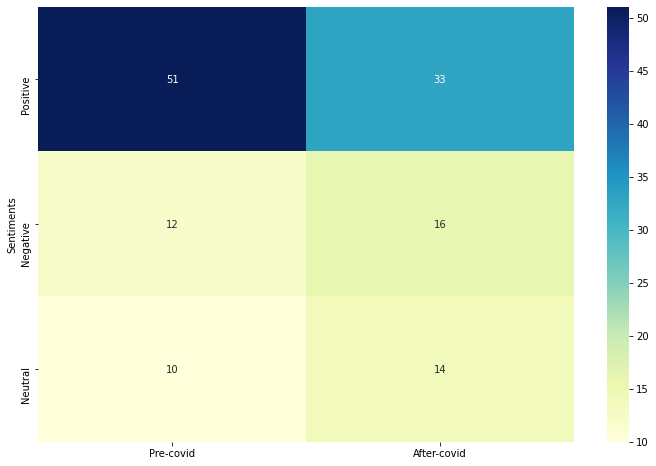

In [132]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8)) 
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")

In [133]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency_table) 
# Print the p-value
print(p)
print(c)
print(dof)
print(expected)

0.11171299527686418
4.383644477577943
2
[[45.08823529 38.91176471]
 [15.02941176 12.97058824]
 [12.88235294 11.11764706]]


In [134]:
#how to remove quotes and ticks from strings
#preprocess text
import re
def text_preprocess(x):
    x = re.sub("\'\w+", '', x)
    #print(x)
    new_string = x.replace("'", "")

    print(new_string)
  
    #replaced_str= x.replace(' " ' , " ")
    #print(replaced_str)

    

In [135]:
x=""""Under the rule's, effective April 1, 2020, an area eligible for a waiver would have to have a 24-month average unemployment rate that is not only 20 percent above the national average but also at least 6 percent.

Anti-poverty groups said the administration’s focus on the unemployment rate was misleading.

“The overall unemployment rate is really a measure of the whole labor market and not people without a high school diploma who are incredibly poor and may lack transportation,” said Stacy Dean, the vice president for food assistance policy at the liberal Center on Budget and Policy Priorities. “We’re talking about a different group who just face a very different labor market.”

The rule is the first of three Agriculture Department efforts to scale back the food stamp program, and so far, Trump administration officials appear unmoved by the protests flooding in. More than 140,000 public comments were submitted on the rule that was made final on Wednesday, and they were overwhelmingly negative.

“The Trump administration is driving the vulnerable into hunger just as the Christmas season approaches,” Senator Chuck Schumer of New York, the Democratic leader, said on Wednesday. “It is heartless. It is cruel. It exposes a deep and shameful cruelness and hypocrisy in this administration.”

The department has also proposed a rule that would close what it calls a loophole that allows people with incomes up to 200 percent of the poverty level — about $50,000 for a family of four — to receive food stamps. The rule would also prevent households with more than $2,250 in assets, or $3,500 for a household with a disabled adult, from receiving food stamps. Those changes would strip nearly three million people of their benefits, the department said, and nearly one million children would lose automatic eligibility for free or reduced-price school meals. The proposal received 75,000 public comments, which were overwhelmingly negative.""" 
text_preprocess(x)

"Under the rule, effective April 1, 2020, an area eligible for a waiver would have to have a 24-month average unemployment rate that is not only 20 percent above the national average but also at least 6 percent.

Anti-poverty groups said the administration’s focus on the unemployment rate was misleading.

“The overall unemployment rate is really a measure of the whole labor market and not people without a high school diploma who are incredibly poor and may lack transportation,” said Stacy Dean, the vice president for food assistance policy at the liberal Center on Budget and Policy Priorities. “We’re talking about a different group who just face a very different labor market.”

The rule is the first of three Agriculture Department efforts to scale back the food stamp program, and so far, Trump administration officials appear unmoved by the protests flooding in. More than 140,000 public comments were submitted on the rule that was made final on Wednesday, and they were overwhelmingly ne

In [136]:
#ML on labeled tweet data



In [137]:
sentence="it sucks to suck but i am doing well"
print(sentiment_analyzer_scores(sentence))

it sucks to suck but i am doing well---- {'neg': 0.3, 'neu': 0.486, 'pos': 0.215, 'compound': -0.0129}
None


In [138]:
newDf = pd.concat(frames)


In [139]:
labeled_tweets=newDf


In [140]:
labeled_tweets=labeled_tweets[labeled_tweets['label']!='neutral']
labeled_tweets

Tweets     label
0                An inspiration in all aspects: Fashion  positive
1                                               fitness  positive
2       beauty and personality. :)KISSES TheFashionIcon  positive
3     Apka Apna Awam Ka Channel Frankline Tv Aam Adm...  positive
4     Beautiful album from  the greatest unsung guit...  positive
...                                                 ...       ...
1112  wish knock out lang talaga for the new school ...  negative
1113                            i miss so much unhappy   negative
1114                                      Same unhappy   negative
1115        Hi instant message your friend  friend lang  negative
1116                        hindi close friend? unhappy  negative

[2303 rows x 2 columns]

In [141]:
#to clean tweets for ML #online
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

import preprocessor as p

def clean_tweets(df):
    tempArr = []
    for line in df:
    #send to tweet_processor
        tmpL = p.clean(line)
        #remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr



In [142]:
train_tweet = clean_tweets(labeled_tweets["Tweets"])
train_tweet = pd.DataFrame(train_tweet)

In [143]:
train_tweet

0
0                 an inspiration in all aspects fashion
1                                               fitness
2          beauty and personality kisses thefashionicon
3     apka apna awam ka channel frankline tv aam adm...
4     beautiful album from the greatest unsung guita...
...                                                 ...
2298  wish knock out lang talaga for the new school ...
2299                             i miss so much unhappy
2300                                       same unhappy
2301         hi instant message your friend friend lang
2302                         hindi close friend unhappy

[2303 rows x 1 columns]

In [144]:
labeled_tweets["clean_tweet"]=train_tweet

<ipython-input-144-6084e8ad67d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_tweets["clean_tweet"]=train_tweet


In [145]:
labeled_tweets

Tweets     label  \
0                An inspiration in all aspects: Fashion  positive   
1                                               fitness  positive   
2       beauty and personality. :)KISSES TheFashionIcon  positive   
3     Apka Apna Awam Ka Channel Frankline Tv Aam Adm...  positive   
4     Beautiful album from  the greatest unsung guit...  positive   
...                                                 ...       ...   
1112  wish knock out lang talaga for the new school ...  negative   
1113                            i miss so much unhappy   negative   
1114                                      Same unhappy   negative   
1115        Hi instant message your friend  friend lang  negative   
1116                        hindi close friend? unhappy  negative   

                                            clean_tweet  
0                 an inspiration in all aspects fashion  
1                                               fitness  
2          beauty and personality kisses thefashionicon  
3     apka apna awam ka channel frankline tv aam adm...  
4     beautiful album from the greatest unsung guita...  
...                                                 ...  
1112          csgobounty giveaway   random key retweets  
1113  random winner retweet and like to be able to w...  
1114  thanks for the recent follow happy to connect ...  
1115                              you are welcome happy  
1116                           this makes a great point  

[2303 rows x 3 columns]

In [146]:
#Got very low accuracy when partioned into 3

# def encode_label(x):
#     if x=="positive":
#         return 2
#     elif x=="negative":
#         return 0
#     elif x=="neutral":
#         return 1

def encode_label(x):
    if x=="negative":
        return 0
    elif x=="positive":
        return 1
   

In [147]:
labeled_tweets['label']=labeled_tweets['label'].apply(encode_label)

<ipython-input-147-37e6ee405c7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_tweets['label']=labeled_tweets['label'].apply(encode_label)


In [148]:
labeled_tweets[labeled_tweets['label']=="neutral"]

Empty DataFrame
Columns: [Tweets, label, clean_tweet]
Index: []

In [149]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split

y = labeled_tweets.label.values
X_train, X_test, y_train, y_test = train_test_split(labeled_tweets.clean_tweet.values, y, 
                                                    random_state=3, 
                                                    test_size=0.2)



In [150]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(X_train) + list(X_test))

# transform documents to document-term matrix

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [151]:
#using tf-idf for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(min_df=1, stop_words='english')

tf.fit(list(X_train) + list(X_test))
X_train_vec=tf.transform(X_train)
X_test_vec=tf.transform(X_test)

In [152]:
a=X_train_vec.toarray()
a[0]
print(len(a[0]))
vectorizer.inverse_transform(a[0])

2162


[array(['connect', 'follow', 'free', 'happy', 'recent', 'thanks', 'want'],
       dtype='<U23')]

In [153]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(X_train_vec, y_train).predict_proba(X_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(X_test_vec)

In [154]:
#accuracy=15.35% for online tweets using SVC , 64% with count vectorizer, 70% with tf-idf 

from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  20.607375271149674 %


In [155]:
#Nb classifier
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
y_train=y_train.astype('int')
mnb.fit(X_train_vec,y_train)
y_pred_nb=mnb.predict(X_test_vec)
print("Accuracy score for NB is: ", accuracy_score(y_test, y_pred_nb) * 100, '%')

Accuracy score for NB is:  20.17353579175705 %


In [156]:
#MLP classifier (56% with CV, 48% with tf-idf)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500)
clf.fit(X_train_vec,y_train)
y_pred=clf.predict(X_test_vec)
print("Accuracy score for MLP is", accuracy_score(y_test,y_pred)* 100, '%')

Accuracy score for MLP is 17.570498915401302 %


In [157]:
#Confusion matrix
#May be we could handle imbalanced class for this?
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[ 17 206]
 [160  78]]


In [158]:
#ML model for fertileground tweets(Need labels first)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

import preprocessor as p

def clean_tweets(df):
    tempArr = []
    for line in df:
    #send to tweet_processor
        tmpL = p.clean(line)
        #remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

def encode_label(x):
    if x=="positive":
        return 2
    elif x=="negative":
        return 0
    elif x=="neutral":
        return 1

labeled_tweets=fertileground_tweets
train_tweet = clean_tweets(labeled_tweets["Text"])
train_tweet = pd.DataFrame(train_tweet)
labeled_tweets["clean_tweet"]=train_tweet

# labeled_tweets['label']=labeled_tweets['label'].apply(encode_label)-- we need this label


y = labeled_tweets.label.values
X_train, X_test, y_train, y_test = train_test_split(labeled_tweets.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=3, 
                                                    test_size=0.2)


# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(X_train) + list(X_test))

# transform documents to document-term matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(X_train_vec, y_train).predict_proba(X_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(X_test_vec)


print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

AttributeError: 'DataFrame' object has no attribute 'label'

In [159]:
#visualization- what can i do to remove irrelevant data?
fertileground_tweets


Unnamed: 0                  Datetime             Tweet Id  \
0             0 2021-01-22 04:12:08+00:00  1352469068452868103   
1             1 2021-01-22 01:00:14+00:00  1352420775530291202   
2             2 2020-11-30 22:02:50+00:00  1333531965245566977   
3             3 2020-11-30 22:01:50+00:00  1333531710907150336   
4             4 2020-11-18 12:44:34+00:00  1329042818199908353   
..          ...                       ...                  ...   
134         158 2018-07-17 18:54:06+00:00  1019294187592802309   
135         159 2018-07-14 02:40:19+00:00  1017961962251186177   
136         160 2018-07-11 02:06:15+00:00  1016866225324949505   
137         161 2018-06-27 02:36:25+00:00  1011800386062209025   
138         162 2018-06-23 02:40:29+00:00  1010351860685922305   

                                                  Text         Username  \
0    @GanucheauAdam Thank you for retweeting! Also ...  _fertileground_   
1    We’ve BEEN asking for this!\n\nKey House leade...  _fertileground_   
2           Mississippi Goals! https://t.co/DrQE0Ycn3j  _fertileground_   
3                        Tips! https://t.co/iyte1eETRN  _fertileground_   
4    @JacksonStateU Athletics and @UHC will be prov...  _fertileground_   
..                                                 ...              ...   
134  #transformationtuesday #newbody #healthylifest...  epicdanceandfit   
135  #postrunfuel #berries #strawberries #strawberr...        SigChiPsi   
136  #postrunmeal #crabsalad #and #sweetpotato #org...        SigChiPsi   
137  #postrunmeal #healthyfood #foodporn #foodporno...        SigChiPsi   
138  It’s a #blueberry stuffed #rasberry stuffed #s...        SigChiPsi   

                User Location  Reply Count  Retweet Count  Like Count  \
0                 Jackson, MS            0              0           0   
1                 Jackson, MS            0              0           0   
2                 Jackson, MS            0              0           2   
3                 Jackson, MS            0              0           0   
4                 Jackson, MS            0              0           0   
..                        ...          ...            ...         ...   
134             Ridgeland, MS            0              0           1   
135  ÜT: 31.608732,-94.600016            0              0           0   
136  ÜT: 31.608732,-94.600016            0              0           0   
137  ÜT: 31.608732,-94.600016            0              0           0   
138  ÜT: 31.608732,-94.600016            0              0           0   

     Quote Count                                        clean_tweet  
0              0  thank you for retweeting also if people want t...  
1              0  weve been asking for thiskey house leader says...  
2              0                                  mississippi goals  
3              0                                               tips  
4              0  athletics and will be providing turkeys on  18...  
..           ...                                                ...  
134            0                         epic dance and fitness inc  
135            0                                      patrick farms  
136            0                                      patrick farms  
137            0                                      patrick farms  
138            0                      its a stuffed stuffed and its  

[139 rows x 11 columns]

In [160]:
fertileground_tweets_datetime['Year']=fertileground_tweets_datetime.index.year
fertileground_tweets_datetime['Month']=fertileground_tweets_datetime.index.month
fertileground_tweets_datetime['Day']=fertileground_tweets_datetime.index.day
fertileground_tweets_datetime['Weekday Name']=fertileground_tweets_datetime.index.day_name()

fertileground_tweets_datetime['date']=fertileground_tweets_datetime.index.date
#fertileground_tweets_datetime['yearMonth']=fertileground_tweets_datetime.index.apply(lambda x: x.strftime('%Y-%m'))

fertileground_tweets_datetime=fertileground_tweets_datetime.reset_index()
fertileground_tweets_datetime['yearMonth'] = fertileground_tweets_datetime['Datetime'].apply(lambda x: x.strftime('%Y-%m'))
fertileground_tweets_datetime.set_index('Datetime',inplace=True)
fertileground_tweets_datetime

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  Month  Day Weekday Name  \
Datetime                                                                
2021-01-22 04:12:08+00:00            0  2021      1   22       Friday   
2021-01-22 01:00:14+00:00            0  2021      1   22       Friday   
2020-11-30 22:02:50+00:00            0  2020     11 

In [161]:
fertileground_tweets_datetime_plot=fertileground_tweets_datetime.groupby('yearMonth').count()
fertileground_tweets_datetime_plot

Unnamed: 0  Tweet Id  Text  Username  User Location  Reply Count  \
yearMonth                                                                     
2018-06             2         2     2         2              2            2   
2018-07             7         7     7         7              7            7   
2018-08             2         2     2         2              2            2   
2018-09             1         1     1         1              1            1   
2018-10             2         2     2         2              2            2   
2019-03             2         2     2         2              2            2   
2019-04             6         6     6         6              3            6   
2019-05             2         2     2         2              2            2   
2019-06             1         1     1         1              1            1   
2019-07             5         5     5         5              5            5   
2019-08             2         2     2         2              2            2   
2019-09             3         3     3         3              3            3   
2019-10             8         8     8         8              8            8   
2019-11             5         5     5         5              5            5   
2019-12             2         2     2         2              2            2   
2020-01             5         5     5         5              5            5   
2020-02             6         6     6         6              5            6   
2020-03            12        12    12        12             12           12   
2020-04             5         5     5         5              4            5   
2020-05            11        11    11        11             11           11   
2020-06            10        10    10        10              9           10   
2020-07             4         4     4         4              4            4   
2020-08             5         5     5         5              5            5   
2020-09             3         3     3         3              3            3   
2020-10             3         3     3         3              3            3   
2020-11             8         8     8         8              8            8   
2020-12             2         2     2         2              2            2   
2021-01             7         7     7         7              7            7   
2021-02             2         2     2         2              2            2   
2021-03             6         6     6         6              6            6   

           Retweet Count  Like Count  Quote Count  Year  Month  Day  \
yearMonth                                                             
2018-06                2           2            2     2      2    2   
2018-07                7           7            7     7      7    7   
2018-08                2           2            2     2      2    2   
2018-09                1           1            1     1      1    1   
2018-10                2           2            2     2      2    2   
2019-03                2           2            2     2      2    2   
2019-04                6           6            6     6      6    6   
2019-05                2           2            2     2      2    2   
2019-06                1           1            1     1      1    1   
2019-07                5           5            5     5      5    5   
2019-08                2           2            2     2      2    2   
2019-09                3           3            3     3      3    3   
2019-10                8           8            8     8      8    8   
2019-11                5           5            5     5      5    5   
2019-12                2           2            2     2      2    2   
2020-01                5           5            5     5      5    5   
2020-02                6           6            6     6      6    6   
2020-03               12          12           12    12     12   12   
2020-04                5           5            5     5      5

Text(0.5, 1.0, 'Time series graph of the number of tweets over the months')

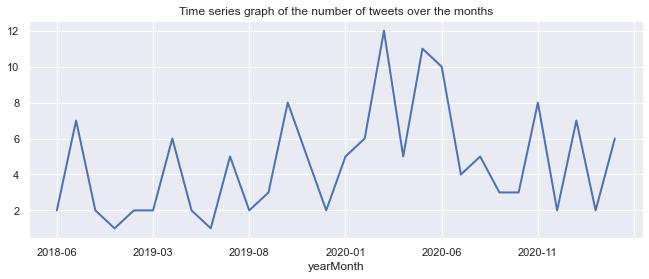

In [162]:
#join the couint with article counts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
fertileground_tweets_datetime_plot['Text'].plot(linewidth=2)
plt.title("Time series graph of the number of tweets over the months")


In [163]:
#Appending columns of scores to dataframe
analyzer = SentimentIntensityAnalyzer()
fertileground_tweets_datetime['compound'] = [analyzer.polarity_scores(tweet)['compound'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime['neg'] = [analyzer.polarity_scores(tweet)['neg'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime['neu'] = [analyzer.polarity_scores(tweet)['neu'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime['pos'] = [analyzer.polarity_scores(tweet)['pos'] for tweet in fertileground_tweets_datetime['Text']]
fertileground_tweets_datetime

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  Month  Day Weekday Name  \
Datetime                                                                
2021-01-22 04:12:08+00:00            0  2021      1   22       Friday   
2021-01-22 01:00:14+00:00            0  2021      1   22       Friday   
2020-11-30 22:02:50+00:00            0  2020     11 

In [164]:
fertileground_tweets.Username.unique()

array(['_fertileground_', '_salamrida', 'MrDJBaker', 'Pacelinerider',
       'calvertlamon', 'TheCamProgram', 'HayesDent1', 'npkveg',
       'KimberlyLCampb3', 'jxntransplants', 'mtmorcelle',
       'MississippiMOV1', 'HeyAprill', 'Lessweforget57', 'JayShad',
       'jessetivy', 'smileingbelle', 'LauraOinAK', 'ColbyDuren',
       'LillianAngle', 'Werdnat', 'TetraStark', 'WK_Kellogg_Fdn',
       'nathanjpitts', 'mdjohnson1663', 'Jonathan_J32', 'FowlerSarah',
       'ggsims77', 'OludareOkusanya', 'jarvisdortch', 'GBarta42384',
       'OMGItsMontelleo', 'mvvlik', 'McMullanMike', 'Troy_Johnson',
       'RiemDebra', 'travisk00', 'WJSClanton', 'DuaneHClayton', 'MS_DHS',
       'Jeff_IAmThatIAm', 'chris_rogerson_', 'debbie_american',
       'olivia_brackeen', 'dexterdanf', 'unorthodox_wf',
       'theonlystarleft', 'CoachTQuick', 'Miracles_R_Born',
       'clemsontyger', 'RonHugh13777418', 'MPBOnline', 'twitwmj',
       'clovejackson', 'iMacHead', 'AnnieCafer', 'hongkongtaichi',
       'jeram

In [165]:
fertileground_tweets_datetime_avgCompound=fertileground_tweets_datetime.groupby('yearMonth').mean()
fertileground_tweets_datetime_avgCompound

Unnamed: 0      Tweet Id  Reply Count  Retweet Count  Like Count  \
yearMonth                                                                     
2018-06    161.500000  1.011076e+18     0.000000       0.000000    0.000000   
2018-07    157.000000  1.020790e+18     0.000000       0.000000    0.428571   
2018-08    152.500000  1.027743e+18     0.000000       0.000000    0.000000   
2018-09    151.000000  1.039627e+18     0.000000       0.000000    0.000000   
2018-10    149.500000  1.051052e+18     0.000000       0.000000    0.500000   
2019-03    100.500000  1.108584e+18     0.000000       0.000000    1.500000   
2019-04    131.166667  1.116916e+18     0.166667       0.666667    1.666667   
2019-05     85.500000  1.128659e+18     0.000000       2.500000    6.000000   
2019-06    124.000000  1.137050e+18     1.000000       0.000000    2.000000   
2019-07    109.400000  1.150149e+18     0.600000       0.600000    7.200000   
2019-08    117.000000  1.161180e+18     0.000000       2.500000    4.500000   
2019-09    100.333333  1.172948e+18     0.333333       0.000000    0.666667   
2019-10     66.750000  1.185663e+18     0.250000       1.000000    3.750000   
2019-11     85.800000  1.196578e+18     0.200000       1.200000    4.800000   
2019-12    103.000000  1.208372e+18     1.000000       0.000000    3.000000   
2020-01     78.000000  1.218017e+18     0.200000       1.600000    5.000000   
2020-02     85.333333  1.230165e+18     0.333333       0.500000    2.166667   
2020-03     49.833333  1.237648e+18     0.333333       1.083333    2.583333   
2020-04    104.400000  1.247917e+18     0.000000       0.000000    0.400000   
2020-05     64.272727  1.262887e+18     0.818182       2.181818    3.909091   
2020-06     42.400000  1.271547e+18     0.600000       3.000000    6.300000   
2020-07     38.500000  1.284927e+18     0.750000       0.500000    2.000000   
2020-08     23.200000  1.294585e+18     0.600000       3.200000    6.400000   
2020-09     39.666667  1.303540e+18     0.333333       0.333333    1.333333   
2020-10     69.666667  1.318838e+18     0.000000       2.333333    1.666667   
2020-11     30.000000  1.329051e+18     0.000000       0.125000    0.750000   
2020-12     89.500000  1.336920e+18     0.500000       0.000000    0.500000   
2021-01     69.285714  1.350169e+18     0.142857       0.285714    0.714286   
2021-02     55.500000  1.360986e+18     0.000000       6.500000    1.500000   
2021-03     90.166667  1.372913e+18     0.000000       1.000000    2.000000   

           Quote Count    Year  Month        Day  compound       neg  \
yearMonth                                                              
2018-06       0.000000  2018.0    6.0  25.000000  0.285950  0.000000   
2018-07       0.000000  2018.0    7.0  21.428571  0.153857  0.000000   
2018-08       0.000000  2018.0    8.0   9.500000  0.136600  0.000000   
2018-09       0.000000  2018.0    9.0  11.000000  0.401900  0.000000   
2018-10       0.000000  2018.0   10.0  13.000000  0.493900  0.000000   
2019-03       0.000000  2019.0    3.0  20.500000  0.681000  0.000000   
2019-04       0.166667  2019.0    4.0  12.500000  0.676900  0.016833   
2019-05       0.000000  2019.0    5.0  15.000000  0.586800  0.020500   
2019-06       0.000000  2019.0    6.0   7.000000  0.570700  0.000000   
2019-07       0.200000  2019.0    7.0  13.400000  0.212760  0.052000   
2019-08       0.000000  2019.0    8.0  12.500000 -0.031250  0.165500   
2019-09       0.000000  2019.0    9.0  14.333333  0.244100  0.051333   
2019-10       0.250000  2019.0   10.0  19.125000  0.392050  0.073375   
2019-11       0.800000  2019.0   11.0  18.200000  0.097740  0.104600   
2019-12       0.500000  2019.0   12.0  21.000000  0.000000  0.083500   
2020-01       0.000000  2020.0    1.0  16.800000  0.172920  0.158400   
2020-02       0.166667  2020.0    2.0  19.166667  0.350600  0.061667   
2020-03       0.000000  2020.0    3.0  10.666667  0.438108  0.018917   
2020-04       0.000000  2020.0    4.0   8.

<AxesSubplot:xlabel='yearMonth'>

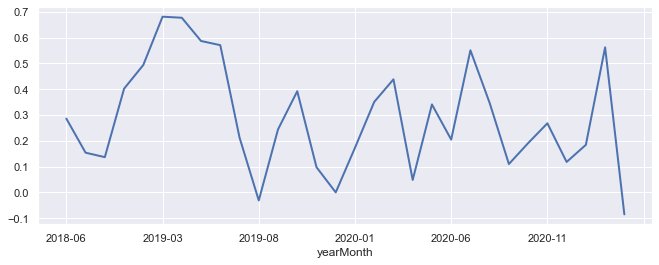

In [166]:
#Average compound sentiment scores by month and year
fertileground_tweets_datetime_avgCompound['compound'].plot(linewidth=2)

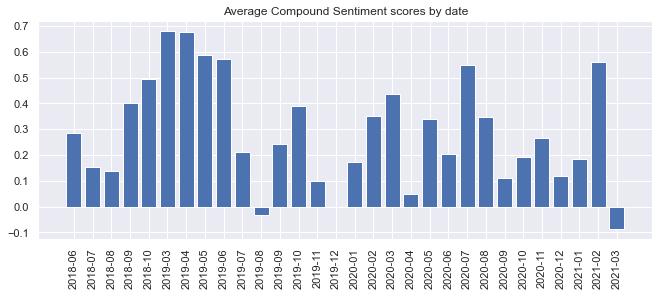

In [167]:
newplot=fertileground_tweets_datetime_avgCompound.reset_index()
plt.bar(newplot['yearMonth'],newplot['compound'])
plt.xticks(rotation = 90)
plt.title("Average Compound Sentiment scores by date")
plt.show()


In [168]:
#to generate wordcloud
text = " ".join(review for review in fertileground_tweets['Text'])
print ("There are {} words in the combination of all tweets".format(len(text)))

There are 26717 words in the combination of all tweets


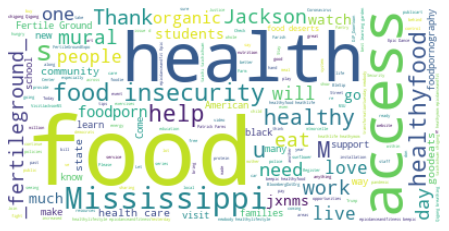

In [169]:
#fileter for stopwords, clean the text before creating

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["https",'t','co','amp'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image in the matplotlib way
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [170]:
fertileground_tweets

Unnamed: 0                  Datetime             Tweet Id  \
0             0 2021-01-22 04:12:08+00:00  1352469068452868103   
1             1 2021-01-22 01:00:14+00:00  1352420775530291202   
2             2 2020-11-30 22:02:50+00:00  1333531965245566977   
3             3 2020-11-30 22:01:50+00:00  1333531710907150336   
4             4 2020-11-18 12:44:34+00:00  1329042818199908353   
..          ...                       ...                  ...   
134         158 2018-07-17 18:54:06+00:00  1019294187592802309   
135         159 2018-07-14 02:40:19+00:00  1017961962251186177   
136         160 2018-07-11 02:06:15+00:00  1016866225324949505   
137         161 2018-06-27 02:36:25+00:00  1011800386062209025   
138         162 2018-06-23 02:40:29+00:00  1010351860685922305   

                                                  Text         Username  \
0    @GanucheauAdam Thank you for retweeting! Also ...  _fertileground_   
1    We’ve BEEN asking for this!\n\nKey House leade...  _fertileground_   
2           Mississippi Goals! https://t.co/DrQE0Ycn3j  _fertileground_   
3                        Tips! https://t.co/iyte1eETRN  _fertileground_   
4    @JacksonStateU Athletics and @UHC will be prov...  _fertileground_   
..                                                 ...              ...   
134  #transformationtuesday #newbody #healthylifest...  epicdanceandfit   
135  #postrunfuel #berries #strawberries #strawberr...        SigChiPsi   
136  #postrunmeal #crabsalad #and #sweetpotato #org...        SigChiPsi   
137  #postrunmeal #healthyfood #foodporn #foodporno...        SigChiPsi   
138  It’s a #blueberry stuffed #rasberry stuffed #s...        SigChiPsi   

                User Location  Reply Count  Retweet Count  Like Count  \
0                 Jackson, MS            0              0           0   
1                 Jackson, MS            0              0           0   
2                 Jackson, MS            0              0           2   
3                 Jackson, MS            0              0           0   
4                 Jackson, MS            0              0           0   
..                        ...          ...            ...         ...   
134             Ridgeland, MS            0              0           1   
135  ÜT: 31.608732,-94.600016            0              0           0   
136  ÜT: 31.608732,-94.600016            0              0           0   
137  ÜT: 31.608732,-94.600016            0              0           0   
138  ÜT: 31.608732,-94.600016            0              0           0   

     Quote Count                                        clean_tweet  
0              0  thank you for retweeting also if people want t...  
1              0  weve been asking for thiskey house leader says...  
2              0                                  mississippi goals  
3              0                                               tips  
4              0  athletics and will be providing turkeys on  18...  
..           ...                                                ...  
134            0                         epic dance and fitness inc  
135            0                                      patrick farms  
136            0                                      patrick farms  
137            0                                      patrick farms  
138            0                      its a stuffed stuffed and its  

[139 rows x 11 columns]

In [171]:
#counting unique usernames
len(fertileground_tweets_datetime.Username.unique())


71

In [172]:
fertileground_tweets_datetime_users=fertileground_tweets_datetime.groupby('Username').count()
fertileground_tweets_usercounts=fertileground_tweets_datetime['Username'].value_counts()
type(fertileground_tweets_usercounts)

pandas.core.series.Series

In [173]:
fertileground_tweets_datetime_users

Unnamed: 0  Tweet Id  Text  User Location  Reply Count  \
Username                                                                  
99BossChick99             1         1     1              1            1   
AnnieCafer                1         1     1              1            1   
AsToldBy_Kell             1         1     1              1            1   
BackroadsStaff            1         1     1              1            1   
CoachTQuick               1         1     1              1            1   
...                     ...       ...   ...            ...          ...   
theonlystarleft           1         1     1              0            1   
travisk00                 1         1     1              1            1   
twitwmj                   1         1     1              1            1   
unorthodox_wf             1         1     1              1            1   
zacrossthem               1         1     1              1            1   

                 Retweet Count  Like Count  Quote Count  Year  Month  Day  \
Username                                                                    
99BossChick99                1           1            1     1      1    1   
AnnieCafer                   1           1            1     1      1    1   
AsToldBy_Kell                1           1            1     1      1    1   
BackroadsStaff               1           1            1     1      1    1   
CoachTQuick                  1           1            1     1      1    1   
...                        ...         ...          ...   ...    ...  ...   
theonlystarleft              1           1            1     1      1    1   
travisk00                    1           1            1     1      1    1   
twitwmj                      1           1            1     1      1    1   
unorthodox_wf                1           1            1     1      1    1   
zacrossthem                  1           1            1     1      1    1   

                 Weekday Name  date  yearMonth  compound  neg  neu  pos  
Username                                                                 
99BossChick99               1     1          1         1    1    1    1  
AnnieCafer                  1     1          1         1    1    1    1  
AsToldBy_Kell               1     1          1         1    1    1    1  
BackroadsStaff              1     1          1         1    1    1    1  
CoachTQuick                 1     1          1         1    1    1    1  
...                       ...   ...        ...       ...  ...  ...  ...  
theonlystarleft             1     1          1         1    1    1    1  
travisk00                   1     1          1         1    1    1    1  
twitwmj                     1     1          1         1    1    1    1  
unorthodox_wf               1     1          1         1    1    1    1  
zacrossthem                 1     1          1         1    1    1    1  

[71 rows x 18 columns]

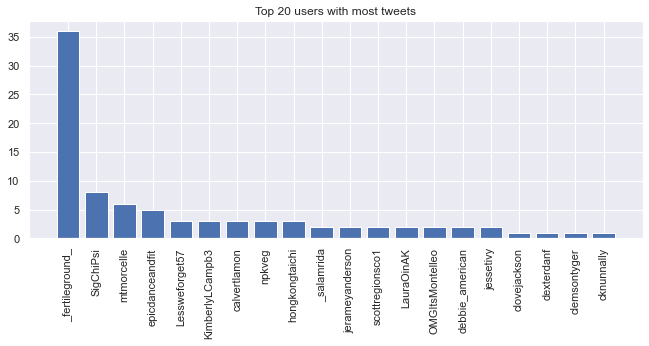

In [174]:
#plotting the count of tweets by username
#fertileground_tweets_datetime_users['Text'].plot(linewidth=2)
#maybe just plot top10?
usersplot=fertileground_tweets_datetime_users.reset_index().sort_values(by=['Text'], ascending=False).head(20)
plt.bar(usersplot['Username'],usersplot['Text'])
plt.xticks(rotation = 90)
plt.title("Top 20 users with most tweets")
plt.show()

In [175]:
#appending data from all the news dataframe into one dataframe
news_list=[news_fertileground, news_foodaccess, news_foodsecurity, news_foodinsecurity]
news_data=pd.concat(news_list)
news_data

Unnamed: 0          Date                                Media  \
0             0   Dec 2, 2020               Craft Brewing Business   
1             1  Jun 10, 2020                           Civil Eats   
2             2  Jun 10, 2020                        Northside Sun   
3             3   Dec 2, 2020                                 WLBT   
4             4   May 6, 2019            The Architect's Newspaper   
..          ...           ...                                  ...   
128         128  Mar 30, 2018  Northeast Mississippi Daily Journal   
129         129  Aug 13, 2020                        Northside Sun   
130         130   Jun 9, 2020                                  CNN   
131         131   Sep 5, 2018                        AZCentral.com   
132         132  Sep 15, 2020                          The Counter   

                                                 Title  \
0    Fertile Ground Beer aiming to open in Jackson,...   
1    ‘Fertile Ground’ Explores How Jackson, Mississ...   
2    “Fertile Ground” Documentary Airing on Mississ...   
3                 Craft brewery set to open in Jackson   
4    In Jackson, Mississippi, architects are taking...   
..                                                 ...   
128  United Way hires new coordinator to oversee Hu...   
129  A conversation with Martha Allen on works of E...   
130  Groceries were hard to find for millions. Now ...   
131  More Arizonans get consistent access to food, ...   
132  Study: 29 million American adults don’t have e...   

                                               Article  \
0    Matthew McLaughlin is a CBB fave. He’s one of ...   
1    Obesity. Poverty. Food Insecurity.\n\nMississi...   
2    June 01, 2020 – The City of Jackson announced ...   
3    “Our purpose is to create shared spaces and a ...   
4    By more than one measure, Jackson, Mississippi...   
..                                                 ...   
128  Success! An email has been sent to with a link...   
129  Extra Table is all about fighting food insecur...   
130  New York (CNN Business) The coronavirus has ma...   
131  A “food desert” is an area without easy access...   
132  Months into the pandemic, an American hunger c...   

                                               Summary  
0    Fertile Ground Beer Co. just announced plans f...  
1    The short documentary Fertile Ground chronicle...  
2    On June 21st at 5pm CST Mississippi Public Bro...  
3    “Our purpose is to create shared spaces and a ...  
4    Jackson is designed around the car, but many r...  
..                                                 ...  
128  An email has been sent to with a link to confi...  
129  Extra Table is all about fighting food insecur...  
130  But even before the pandemic, millions of peop...  
131  Slightly more Arizonan households, 13.1 percen...  
132  Months into the pandemic, an American hunger c...  

[548 rows x 6 columns]

In [176]:
#finding duplicate rows based on all columns
duplicateRowsDF = news_data[news_data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
    Unnamed: 0          Date                            Media  \
0            0  Oct 10, 2020       Mississippi State Newsroom   
5            5  Nov 24, 2020           Jackson Clarion Ledger   
14          14  Sep 10, 2019  Mississippi Public Broadcasting   
69          69  Nov 16, 2020       Mississippi State Newsroom   

                                                Title  \
0   MSU’s Keenum applauds selection of World Food ...   
5                                          Get Access   
14  Mississippi Brings Awareness to Food Insecurit...   
69  Bully's Closet and Pantry offering premade tak...   

                                              Article  \
0   Contact: James Carskadon\n\nMSU President Mark...   
5        You are not authorized to view this content.   
14  Around 16 percent of Mississippi households ar...   
69  Bully's Closet and Pantry is offering premade ...   

                                    

In [177]:
#finding unique title
len(news_data['Title'].unique())

436

In [178]:
# Select all duplicate rows based on one column
duplicateRowsDF = news_data[news_data.duplicated(['Title'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
     Unnamed: 0          Date                   Media  \
4             4  Feb 26, 2020      Jackson Free Press   
6             6  Nov 24, 2020  Jackson Clarion Ledger   
7             7  Nov 29, 2018                 ARTnews   
15           15  Jun 10, 2020              Civil Eats   
35           35  Mar 15, 2020               Bloomberg   
..          ...           ...                     ...   
121         121   Nov 5, 2020              BetaBoston   
125         125   Oct 2, 2020                   Wiley   
127         127  Jan 31, 2019       Mississippi Today   
130         130   Jun 9, 2020                     CNN   
131         131   Sep 5, 2018           AZCentral.com   

                                                 Title  \
4        Jackson's Food Insecurity Focus in April Expo   
6                                           Get Access   
7    Jackson, Mississippi, Named Winner of Bloomber...   
15   ‘Fertile Ground’ Explores How Jac

In [179]:
news_data=news_data.drop_duplicates()
news_data

Unnamed: 0          Date                                Media  \
0             0   Dec 2, 2020               Craft Brewing Business   
1             1  Jun 10, 2020                           Civil Eats   
2             2  Jun 10, 2020                        Northside Sun   
3             3   Dec 2, 2020                                 WLBT   
4             4   May 6, 2019            The Architect's Newspaper   
..          ...           ...                                  ...   
128         128  Mar 30, 2018  Northeast Mississippi Daily Journal   
129         129  Aug 13, 2020                        Northside Sun   
130         130   Jun 9, 2020                                  CNN   
131         131   Sep 5, 2018                        AZCentral.com   
132         132  Sep 15, 2020                          The Counter   

                                                 Title  \
0    Fertile Ground Beer aiming to open in Jackson,...   
1    ‘Fertile Ground’ Explores How Jackson, Mississ...   
2    “Fertile Ground” Documentary Airing on Mississ...   
3                 Craft brewery set to open in Jackson   
4    In Jackson, Mississippi, architects are taking...   
..                                                 ...   
128  United Way hires new coordinator to oversee Hu...   
129  A conversation with Martha Allen on works of E...   
130  Groceries were hard to find for millions. Now ...   
131  More Arizonans get consistent access to food, ...   
132  Study: 29 million American adults don’t have e...   

                                               Article  \
0    Matthew McLaughlin is a CBB fave. He’s one of ...   
1    Obesity. Poverty. Food Insecurity.\n\nMississi...   
2    June 01, 2020 – The City of Jackson announced ...   
3    “Our purpose is to create shared spaces and a ...   
4    By more than one measure, Jackson, Mississippi...   
..                                                 ...   
128  Success! An email has been sent to with a link...   
129  Extra Table is all about fighting food insecur...   
130  New York (CNN Business) The coronavirus has ma...   
131  A “food desert” is an area without easy access...   
132  Months into the pandemic, an American hunger c...   

                                               Summary  
0    Fertile Ground Beer Co. just announced plans f...  
1    The short documentary Fertile Ground chronicle...  
2    On June 21st at 5pm CST Mississippi Public Bro...  
3    “Our purpose is to create shared spaces and a ...  
4    Jackson is designed around the car, but many r...  
..                                                 ...  
128  An email has been sent to with a link to confi...  
129  Extra Table is all about fighting food insecur...  
130  But even before the pandemic, millions of peop...  
131  Slightly more Arizonan households, 13.1 percen...  
132  Months into the pandemic, an American hunger c...  

[544 rows x 6 columns]

In [180]:
#creating  a new csv file for all data from news
news_data.to_csv("google_allnews.csv")

In [181]:
#finding unique media sources and their counts
news_data['Media'].unique()

array(['Craft Brewing Business', 'Civil Eats', 'Northside Sun', 'WLBT',
       "The Architect's Newspaper", 'ARTnews', 'WJTV',
       'Jackson Free Press', 'Brewbound.com', 'Undark Magazine',
       'Northeast Mississippi Daily Journal', 'Mississippi Today',
       'Jackson Clarion Ledger', 'The Intercept', 'GreenBiz',
       'FOX 8 Live WVUE', 'HubcitySPOKES.com', 'Delta Business Journal',
       'Lincoln Journal Star', 'Blue Springs Examiner', 'WholeHogSports',
       'Mississippi State Newsroom', 'WLOX', 'The Commercial Dispatch',
       'Essence', nan, 'Vox', 'History', 'Earth Island Journal',
       'The Atlantic', 'Hattiesburg American',
       'Center for Public Integrity', 'Vanity Fair', 'PBS NewsHour',
       'Playbill.com', 'Natchez Democrat', 'Kosciusko Star Herald',
       '247Sports', 'CBSSports.com', 'The Commercial Appeal',
       'Washington Post', 'MarineLink', 'The New York Times', 'ArchDaily',
       'Science Friday', 'Yale Environment 360', 'Mother Jones',
       'H

In [182]:
news_data_mediacount=news_data.groupby('Media').count()
news_data_mediacount

Unnamed: 0  Date  Title  Article  Summary
Media                                                      
247Sports                  1     1      1        1        1
AAMC                       2     2      2        2        2
ARTnews                    2     2      2        2        2
AZCentral.com              2     2      2        2        2
Agri-Pulse                 1     1      1        1        1
...                      ...   ...    ...      ...      ...
al.com                     1     1      1        1        1
leader-call.com            1     1      1        1        1
talkbusiness.net           2     2      2        2        2
vtdigger.org               1     1      1        1        1
wbckfm.com                 1     1      1        1        1

[198 rows x 5 columns]

<BarContainer object of 198 artists>

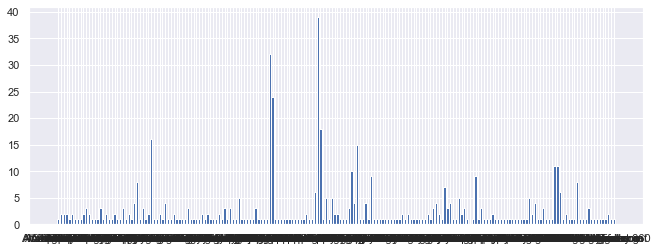

In [183]:
#bar graphs sowing the counts by all media sources
news_data_mediacountplot=news_data_mediacount.reset_index()
# plt.barh(news_data_mediacountplot['Media'],news_data_mediacountplot['Title'])
# plt.show()
plt.bar(news_data_mediacountplot['Media'],news_data_mediacountplot['Title'])

In [184]:
news_data_mediacountplot=news_data_mediacountplot.sort_values(by=['Title'], ascending=False)
news_data_mediacountplot_top10=news_data_mediacountplot.head(10)

<BarContainer object of 10 artists>

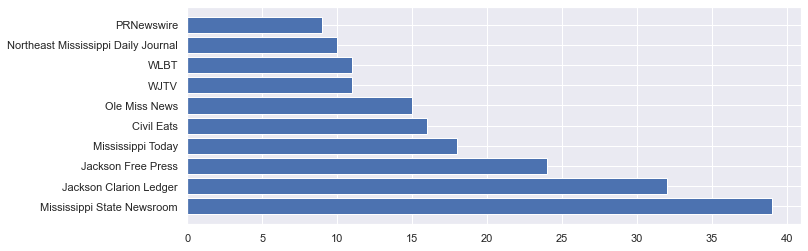

In [185]:
#top 10 news media sources
plt.barh(news_data_mediacountplot_top10['Media'],news_data_mediacountplot_top10['Title'])

In [186]:
#viz for the frequency by month(complexity- date nor in format)
#fertileground_tweets_datetime_plot['Text'].plot(linewidth=2)
#news_data.info()
news_data['Date']
#news_data['Date']=pd.to_datetime(news_data['Date'])

0       Dec 2, 2020
1      Jun 10, 2020
2      Jun 10, 2020
3       Dec 2, 2020
4       May 6, 2019
           ...     
128    Mar 30, 2018
129    Aug 13, 2020
130     Jun 9, 2020
131     Sep 5, 2018
132    Sep 15, 2020
Name: Date, Length: 544, dtype: object

In [187]:
from dateutil.parser import parse
def convertDate(str):
    try:
        datetime=parse(str)
        print(type(datetime))
        return datetime
    except:
        return None
news_data['Datetime']=news_data['Date'].apply(convertDate)
news_data['Datetime'].dtypes


def convertyearMonth(datetime):
    try:
        yearmonth=datetime.strftime('%Y-%m')
        return yearmonth
    except:
        return
news_data['yearMonth'] = news_data['Datetime'].apply(convertyearMonth)


    #print(datetime.strftime('%Y-%M-%D'))

<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.dat

<ipython-input-187-705485cacfd3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['Datetime']=news_data['Date'].apply(convertDate)
<ipython-input-187-705485cacfd3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['yearMonth'] = news_data['Datetime'].apply(convertyearMonth)


In [188]:
news_data

Unnamed: 0          Date                                Media  \
0             0   Dec 2, 2020               Craft Brewing Business   
1             1  Jun 10, 2020                           Civil Eats   
2             2  Jun 10, 2020                        Northside Sun   
3             3   Dec 2, 2020                                 WLBT   
4             4   May 6, 2019            The Architect's Newspaper   
..          ...           ...                                  ...   
128         128  Mar 30, 2018  Northeast Mississippi Daily Journal   
129         129  Aug 13, 2020                        Northside Sun   
130         130   Jun 9, 2020                                  CNN   
131         131   Sep 5, 2018                        AZCentral.com   
132         132  Sep 15, 2020                          The Counter   

                                                 Title  \
0    Fertile Ground Beer aiming to open in Jackson,...   
1    ‘Fertile Ground’ Explores How Jackson, Mississ...   
2    “Fertile Ground” Documentary Airing on Mississ...   
3                 Craft brewery set to open in Jackson   
4    In Jackson, Mississippi, architects are taking...   
..                                                 ...   
128  United Way hires new coordinator to oversee Hu...   
129  A conversation with Martha Allen on works of E...   
130  Groceries were hard to find for millions. Now ...   
131  More Arizonans get consistent access to food, ...   
132  Study: 29 million American adults don’t have e...   

                                               Article  \
0    Matthew McLaughlin is a CBB fave. He’s one of ...   
1    Obesity. Poverty. Food Insecurity.\n\nMississi...   
2    June 01, 2020 – The City of Jackson announced ...   
3    “Our purpose is to create shared spaces and a ...   
4    By more than one measure, Jackson, Mississippi...   
..                                                 ...   
128  Success! An email has been sent to with a link...   
129  Extra Table is all about fighting food insecur...   
130  New York (CNN Business) The coronavirus has ma...   
131  A “food desert” is an area without easy access...   
132  Months into the pandemic, an American hunger c...   

                                               Summary   Datetime yearMonth  
0    Fertile Ground Beer Co. just announced plans f... 2020-12-02   2020-12  
1    The short documentary Fertile Ground chronicle... 2020-06-10   2020-06  
2    On June 21st at 5pm CST Mississippi Public Bro... 2020-06-10   2020-06  
3    “Our purpose is to create shared spaces and a ... 2020-12-02   2020-12  
4    Jackson is designed around the car, but many r... 2019-05-06   2019-05  
..                                                 ...        ...       ...  
128  An email has been sent to with a link to confi... 2018-03-30   2018-03  
129  Extra Table is all about fighting food insecur... 2020-08-13   2020-08  
130  But even before the pandemic, millions of peop... 2020-06-09   2020-06  
131  Slightly more Arizonan households, 13.1 percen... 2018-09-05   2018-09  
132  Months into the pandemic, an American hunger c... 2020-09-15   2020-09  

[544 rows x 8 columns]

In [198]:
news_data_yearMonth=news_data.groupby('yearMonth').count()
news_data_yearMonth

Unnamed: 0  Date  Media  Title  Article  Summary  Datetime  \
yearMonth                                                               
2018-03             7     7      7      7        7        7         7   
2018-04             2     2      2      2        2        2         2   
2018-05            10    10     10     10       10       10        10   
2018-06             6     6      6      6        6        6         6   
2018-07             3     3      3      3        3        3         3   
2018-08             2     2      2      2        2        2         2   
2018-09             6     6      6      6        6        6         6   
2018-10             2     2      2      2        2        2         2   
2018-11             7     7      7      7        7        7         7   
2018-12             5     5      5      5        5        5         5   
2019-01             7     7      7      7        7        7         7   
2019-02             2     2      2      2        2        2         2   
2019-03             3     3      3      3        3        3         3   
2019-04            10    10     10     10       10       10        10   
2019-05            12    12     12     12       12       12        12   
2019-06             4     4      4      4        4        4         4   
2019-07            16    16     16     16       16       16        16   
2019-08            14    14     14     14       14       14        14   
2019-09            11    11     11     11       11       11        11   
2019-10            11    11     11     11       11       11        11   
2019-11            15    15     15     15       15       15        15   
2019-12            21    21     21     21       21       21        21   
2020-01            13    13     13     13       13       13        13   
2020-02            12    12     12     12       12       12        12   
2020-03            27    27     27     27       27       27        27   
2020-04            24    24     24     24       24       24        24   
2020-05            26    26     26     26       26       26        26   
2020-06            26    26     26     26       26       26        26   
2020-07             8     8      8      8        8        8         8   
2020-08            29    29     29     29       29       29        29   
2020-09            34    34     34     34       34       34        34   
2020-10            26    26     26     26       26       26        26   
2020-11            23    23     23     23       23       23        23   
2020-12            41    41     41     41       41       41        41   
2021-01            15    15     15     15       15       15        15   

           compound  
yearMonth            
2018-03           7  
2018-04           2  
2018-05          10  
2018-06           6  
2018-07           3  
2018-08           2  
2018-09           6  
2018-10           2  
2018-11           7  
2018-12           5  
2019-01           7  
2019-02           2  
2019-03           3  
2019-04          10  
2019-05          12  
2019-06           4  
2019-07          16  
2019-08          14  
2019-09          11  
2019-10          11  
2019-11          15  
2019-12          21  
2020-01          13  
2020-02          12  
2020-03          27  
2020-04          24  
2020-05          26  
2020-06          26  
2020-07           8  
2020-08          29  
2020-09          34  
2020-10          26  
2020-11          23  
2020-12          41  
2021-01          15

Text(0.5, 1.0, 'Number of news articles by date')

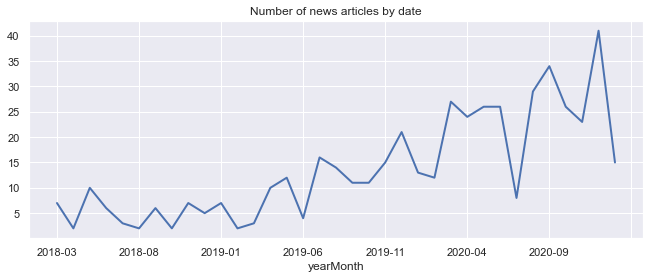

In [199]:
#Line graph for the number of articles by month .  why increasing?
news_data_yearMonth['Title'].plot(linewidth=2)
plt.title("Number of news articles by date")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

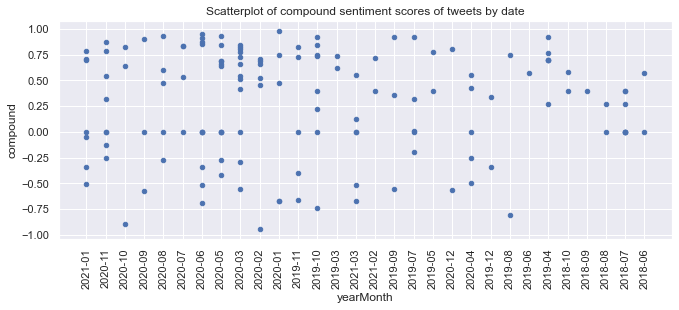

In [200]:
#scatter plot for the compound  sentiment scores for the tweets
scatterplot1=fertileground_tweets_datetime.reset_index()
scatterplot1.plot.scatter(x='yearMonth', y='compound', title= "Scatterplot of compound sentiment scores of tweets by date");
plt.xticks(rotation=90)

# plot.show(block=True)

In [201]:
#visualizations for average compound scores from article
def calculateScoreArticle(paragraph):
#paragraphs=news_data['Article'].to_list()
    #print(paragraphs)
    #c=0
    try:
        #for paragraph in paragraphs:
            #c=c+1
        #     print(paragraph)
           # print("**********************************************************************")

        sentence_list = tokenize.sent_tokenize(paragraph)
        #print(sentence_list)
        paragraphSentiments = 0.0
        for sentence in sentence_list:
            vs = analyser.polarity_scores(sentence)
            #print("{:-<69} {}".format(sentence, str(vs["compound"])))
            paragraphSentiments += vs["compound"]
        #news_data['compound']=
        #print(round(paragraphSentiments / len(sentence_list), 4))
        return round(paragraphSentiments / len(sentence_list), 4)
        print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sentence_list), 4)))
        #print("----------------------------------------------------")
    except:
        return 0
#print(c)
#analyzer = SentimentIntensityAnalyzer()

news_data['compound'] = [calculateScoreArticle(text) for text in news_data['Article']]
# for text in news_data['Article']:
#     print(text)
#news_data['compound'] = [analyzer.polarity_scores(tweet)['compound'] for tweet in fertileground_tweets_datetime['Text']]

<ipython-input-201-6a70925fe40b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['compound'] = [calculateScoreArticle(text) for text in news_data['Article']]


In [202]:
news_data['compound'].values

array([ 4.072e-01, -1.840e-02,  3.227e-01,  7.717e-01,  1.023e-01,
        2.671e-01,  1.324e-01,  2.456e-01, -4.290e-02,  3.701e-01,
       -4.370e-02,  0.000e+00,  9.630e-02,  1.746e-01,  7.970e-02,
        2.828e-01,  1.365e-01,  3.715e-01, -7.700e-03,  4.910e-02,
        2.004e-01,  1.742e-01,  1.222e-01,  2.808e-01,  2.479e-01,
        2.708e-01,  1.276e-01, -4.500e-03,  1.843e-01,  2.287e-01,
        2.158e-01,  2.694e-01,  2.665e-01,  3.346e-01,  3.484e-01,
        1.626e-01,  1.017e-01,  4.410e-02,  1.777e-01,  2.524e-01,
        1.419e-01,  1.220e-01,  2.035e-01, -1.039e-01,  3.490e-02,
        8.500e-03, -6.370e-02, -2.660e-01,  2.670e-01,  1.600e-01,
        2.134e-01,  1.023e-01, -3.400e-03,  5.100e-02,  1.573e-01,
        2.785e-01, -5.962e-01,  1.682e-01,  1.600e-03,  0.000e+00,
        2.380e-01,  2.993e-01,  2.900e-02,  8.520e-02,  4.790e-02,
        8.900e-03,  1.670e-01,  9.890e-02,  2.037e-01,  1.010e-02,
        1.196e-01,  1.722e-01,  1.059e-01,  1.448e-01,  2.980e

In [203]:
news_data

Unnamed: 0          Date                                Media  \
0             0   Dec 2, 2020               Craft Brewing Business   
1             1  Jun 10, 2020                           Civil Eats   
2             2  Jun 10, 2020                        Northside Sun   
3             3   Dec 2, 2020                                 WLBT   
4             4   May 6, 2019            The Architect's Newspaper   
..          ...           ...                                  ...   
128         128  Mar 30, 2018  Northeast Mississippi Daily Journal   
129         129  Aug 13, 2020                        Northside Sun   
130         130   Jun 9, 2020                                  CNN   
131         131   Sep 5, 2018                        AZCentral.com   
132         132  Sep 15, 2020                          The Counter   

                                                 Title  \
0    Fertile Ground Beer aiming to open in Jackson,...   
1    ‘Fertile Ground’ Explores How Jackson, Mississ...   
2    “Fertile Ground” Documentary Airing on Mississ...   
3                 Craft brewery set to open in Jackson   
4    In Jackson, Mississippi, architects are taking...   
..                                                 ...   
128  United Way hires new coordinator to oversee Hu...   
129  A conversation with Martha Allen on works of E...   
130  Groceries were hard to find for millions. Now ...   
131  More Arizonans get consistent access to food, ...   
132  Study: 29 million American adults don’t have e...   

                                               Article  \
0    Matthew McLaughlin is a CBB fave. He’s one of ...   
1    Obesity. Poverty. Food Insecurity.\n\nMississi...   
2    June 01, 2020 – The City of Jackson announced ...   
3    “Our purpose is to create shared spaces and a ...   
4    By more than one measure, Jackson, Mississippi...   
..                                                 ...   
128  Success! An email has been sent to with a link...   
129  Extra Table is all about fighting food insecur...   
130  New York (CNN Business) The coronavirus has ma...   
131  A “food desert” is an area without easy access...   
132  Months into the pandemic, an American hunger c...   

                                               Summary   Datetime yearMonth  \
0    Fertile Ground Beer Co. just announced plans f... 2020-12-02   2020-12   
1    The short documentary Fertile Ground chronicle... 2020-06-10   2020-06   
2    On June 21st at 5pm CST Mississippi Public Bro... 2020-06-10   2020-06   
3    “Our purpose is to create shared spaces and a ... 2020-12-02   2020-12   
4    Jackson is designed around the car, but many r... 2019-05-06   2019-05   
..                                                 ...        ...       ...   
128  An email has been sent to with a link to confi... 2018-03-30   2018-03   
129  Extra Table is all about fighting food insecur... 2020-08-13   2020-08   
130  But even before the pandemic, millions of peop... 2020-06-09   2020-06   
131  Slightly more Arizonan households, 13.1 percen... 2018-09-05   2018-09   
132  Months into the pandemic, an American hunger c... 2020-09-15   2020-09   

     compound  
0      0.4072  
1     -0.0184  
2      0.3227  
3      0.7717  
4      0.1023  
..        ...  
128    0.3057  
129    0.1546  
130   -0.0336  
131   -0.0219  
132   -0.1986  

[480 rows x 9 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

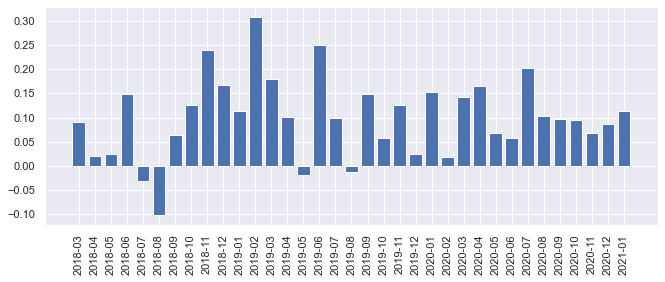

In [204]:
#bar graph fro avergae compound sentiment scores
news_data_avgComp=news_data.groupby('yearMonth').mean()
news_data_avgComp
newsSentimentplot=news_data_avgComp.reset_index()
plt.bar(newsSentimentplot['yearMonth'],newsSentimentplot['compound'])
plt.xticks(rotation=90)


In [205]:
news_data= news_data.dropna(axis = 0, how ='any') 
news_data

Unnamed: 0          Date                                Media  \
0             0   Dec 2, 2020               Craft Brewing Business   
1             1  Jun 10, 2020                           Civil Eats   
2             2  Jun 10, 2020                        Northside Sun   
3             3   Dec 2, 2020                                 WLBT   
4             4   May 6, 2019            The Architect's Newspaper   
..          ...           ...                                  ...   
128         128  Mar 30, 2018  Northeast Mississippi Daily Journal   
129         129  Aug 13, 2020                        Northside Sun   
130         130   Jun 9, 2020                                  CNN   
131         131   Sep 5, 2018                        AZCentral.com   
132         132  Sep 15, 2020                          The Counter   

                                                 Title  \
0    Fertile Ground Beer aiming to open in Jackson,...   
1    ‘Fertile Ground’ Explores How Jackson, Mississ...   
2    “Fertile Ground” Documentary Airing on Mississ...   
3                 Craft brewery set to open in Jackson   
4    In Jackson, Mississippi, architects are taking...   
..                                                 ...   
128  United Way hires new coordinator to oversee Hu...   
129  A conversation with Martha Allen on works of E...   
130  Groceries were hard to find for millions. Now ...   
131  More Arizonans get consistent access to food, ...   
132  Study: 29 million American adults don’t have e...   

                                               Article  \
0    Matthew McLaughlin is a CBB fave. He’s one of ...   
1    Obesity. Poverty. Food Insecurity.\n\nMississi...   
2    June 01, 2020 – The City of Jackson announced ...   
3    “Our purpose is to create shared spaces and a ...   
4    By more than one measure, Jackson, Mississippi...   
..                                                 ...   
128  Success! An email has been sent to with a link...   
129  Extra Table is all about fighting food insecur...   
130  New York (CNN Business) The coronavirus has ma...   
131  A “food desert” is an area without easy access...   
132  Months into the pandemic, an American hunger c...   

                                               Summary   Datetime yearMonth  \
0    Fertile Ground Beer Co. just announced plans f... 2020-12-02   2020-12   
1    The short documentary Fertile Ground chronicle... 2020-06-10   2020-06   
2    On June 21st at 5pm CST Mississippi Public Bro... 2020-06-10   2020-06   
3    “Our purpose is to create shared spaces and a ... 2020-12-02   2020-12   
4    Jackson is designed around the car, but many r... 2019-05-06   2019-05   
..                                                 ...        ...       ...   
128  An email has been sent to with a link to confi... 2018-03-30   2018-03   
129  Extra Table is all about fighting food insecur... 2020-08-13   2020-08   
130  But even before the pandemic, millions of peop... 2020-06-09   2020-06   
131  Slightly more Arizonan households, 13.1 percen... 2018-09-05   2018-09   
132  Months into the pandemic, an American hunger c... 2020-09-15   2020-09   

     compound  
0      0.4072  
1     -0.0184  
2      0.3227  
3      0.7717  
4      0.1023  
..        ...  
128    0.3057  
129    0.1546  
130   -0.0336  
131   -0.0219  
132   -0.1986  

[480 rows x 9 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

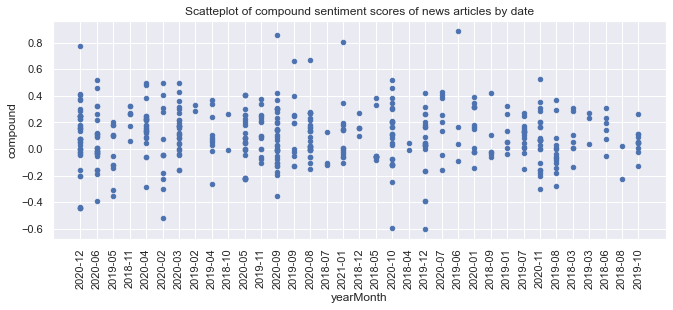

In [206]:
#scatter plot for the compound sentiment scores for news data
scatterplot_newsScore=news_data.reset_index()
scatterplot_newsScore.plot.scatter(x='yearMonth', y='compound', title= "Scatteplot of compound sentiment scores of news articles by date")
plt.xticks(rotation='vertical')

In [207]:
#processing for each tweet data
def tweetprocess(df):
    df['Datetime']=pd.to_datetime(df['Datetime'])
    df=df.set_index(['Datetime'])
    df['Year']=df.index.year
    df['Month']=df.index.month
    df['Day']=df.index.day
    df['Weekday Name']=df.index.day_name()

    df['date']=df.index.date
    

    df=df.reset_index()
    df['yearMonth'] = df['Datetime'].apply(lambda x: x.strftime('%Y-%m'))
    df.set_index('Datetime',inplace=True)
    

#     fertileground_tweets_datetime_plot=fertileground_tweets_datetime.groupby('yearMonth').count()
#     fertileground_tweets_datetime_plot['Text'].plot(linewidth=2)

    analyzer = SentimentIntensityAnalyzer()
    df['compound'] = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['Text']]
    df['neg'] = [analyzer.polarity_scores(tweet)['neg'] for tweet in df['Text']]
    df['neu'] = [analyzer.polarity_scores(tweet)['neu'] for tweet in df['Text']]
    df['pos'] = [analyzer.polarity_scores(tweet)['pos'] for tweet in df['Text']]
    
    return df
   # fertileground_tweets_datetime_avgCompound=fertileground_tweets_datetime.groupby('yearMonth').mean()

#     newplot=fertileground_tweets_datetime_avgCompound.reset_index()
#     plt.bar(newplot['yearMonth'],newplot['compound'])

#     scatterplot1=fertileground_tweets_datetime.reset_index()
#     scatterplot1.plot.scatter(x='yearMonth', y='compound', title= "Scatter plot between two variables");

In [208]:
#processing for each tweet files
tweets_fertileground=pd.read_csv("tweets_fertileground.csv")
tweets_fertilegroundjxn=pd.read_csv("tweets_fertilegroundjxn.csv")
tweets_foodaccess=pd.read_csv("tweets_foodaccess.csv")
tweets_fooddeserts=pd.read_csv("tweets_fooddeserts.csv")
tweets_foodhealth=pd.read_csv("tweets_foodhealth.csv")
tweets_foodinsecurity=pd.read_csv("tweets_foodinsecurity.csv")
tweets_foodsecurity=pd.read_csv("tweets_foodsecurity.csv")
tweets_foodswamps=pd.read_csv("tweets_foodswamps.csv")
tweets_healthyfood=pd.read_csv("tweets_healthyfood.csv")

tweets_fertileground=tweetprocess(tweets_fertileground)
tweets_fertilegroundjxn=tweetprocess(tweets_fertilegroundjxn)
tweets_foodaccess=tweetprocess(tweets_foodaccess)
tweets_fooddeserts=tweetprocess(tweets_fooddeserts)
tweets_foodhealth=tweetprocess(tweets_foodhealth)
tweets_foodinsecurity=tweetprocess(tweets_foodinsecurity)
tweets_foodsecurity=tweetprocess(tweets_foodsecurity)
tweets_foodswamps=tweetprocess(tweets_foodswamps)
tweets_healthyfood=tweetprocess(tweets_healthyfood)

In [209]:
tweets_fertileground

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
2020-11-16 23:15:57+00:00           5  1328476931952676864   
2020-11-12 18:21:17+00:00           6  1326953227703693313   
2020-10-30 13:56:36+00:00           7  1322175576149499904   
2020-09-21 18:46:17+00:00           8  1308115349242548232   
2020-09-01 18:01:36+00:00           9  1300856347265830912   
2020-08-24 17:10:10+00:00          10  1297944299640967169   
2020-08-24 17:08:36+00:00          11  1297943904080232454   
2020-08-24 17:08:15+00:00          12  1297943816494874626   
2020-08-17 13:35:10+00:00          13  1295353478638952449   
2020-08-17 13:35:10+00:00          14  1295353477707825155   
2020-08-01 18:15:02+00:00          15  1289625703802175494   
2020-07-28 19:21:31+00:00          16  1288192884534136832   
2020-07-28 01:56:53+00:00          17  1287929991590809600   
2020-07-03 03:17:11+00:00          18  1278890504709705728   
2020-06-20 16:46:19+00:00          19  1274383087657463808   
2020-06-17 21:30:05+00:00          20  1273367335823462412   
2020-06-14 23:48:29+00:00          21  1272314999982129152   
2020-06-14 23:28:56+00:00          22  1272310079845474305   
2020-06-14 22:41:23+00:00          23  1272298114511253510   
2020-06-13 20:42:49+00:00          24  1271905888769585153   
2020-06-11 14:54:53+00:00          25  1271093554904018949   
2020-06-11 03:43:56+00:00          26  1270924702173876224   
2020-06-05 15:24:48+00:00          27  1268926753218670599   
2020-05-28 16:26:13+00:00          28  1266043108006993921   
2020-05-27 21:58:44+00:00          29  1265764398460817409   
2020-05-20 13:33:30+00:00          30  1263100538230579202   
2020-05-20 13:30:57+00:00          31  1263099898746081281   
2020-05-18 19:24:31+00:00          32  1262464099230920706   
2020-05-11 19:18:26+00:00          33  1259925852315361282   
2020-03-21 16:28:58+00:00          34  1241401424732438528   
2020-03-19 19:54:51+00:00          35  1240728461255356418   
2020-03-18 21:36:09+00:00          36  1240391566486798342   
2020-03-13 18:19:35+00:00          37  1238530160770588675   
2020-03-13 18:17:34+00:00          38  1238529654107054080   
2020-03-09 14:30:08+00:00          39  1237022865431629825   
2020-03-07 19:56:38+00:00          40  1236380257101524993   
2020-03-04 16:13:10+00:00          41  1235236855974682624   
2020-03-03 15:36:47+00:00          42  1234865311981154308   
2020-03-01 16:23:16+00:00          43  1234152231546560513   
2020-03-01 16:22:28+00:00          44  1234152033776816128   
2020-02-29 15:40:37+00:00          45  1233779111962857472   
2020-02-29 04:08:12+00:00          46  1233604859947102209   
2020-01-28 00:51:09+00:00          47  1221958859880910849   
2019-11-26 16:46:31+00:00          48  1199368847163379712   
2019-11-21 04:51:11+00:00          49  1197376890975195139   
2019-10-30 21:32:24+00:00          50  1189656323648086017   
2019-10-30 19:54:02+00:00          51  1189631568010186757   
2019-10-19 15:39:57+00:00          52  1185581359961661440   
2019-03-14 15:06:24+00:00          53  1106209972956917760   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov.

In [210]:
#plots for individual tweet sets
def viztweets(df):
    df_plot=df.groupby('yearMonth').count()
    df_plot['Text'].plot(linewidth=2)

    df_avgCompound=df.groupby('yearMonth').mean()
    df_scatterplot1=df.reset_index()
    df_scatterplot1.plot.scatter(x='yearMonth', y='compound', title= "Scatterplot of compound sentiment score of tweets related to keyword 'food insecurity'");

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


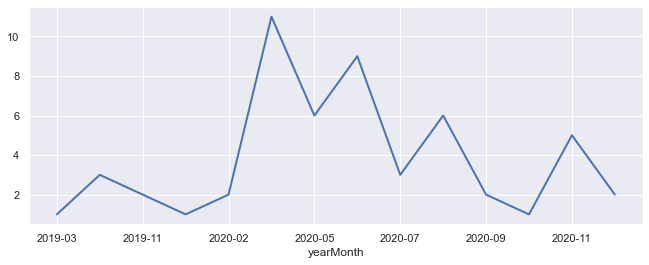

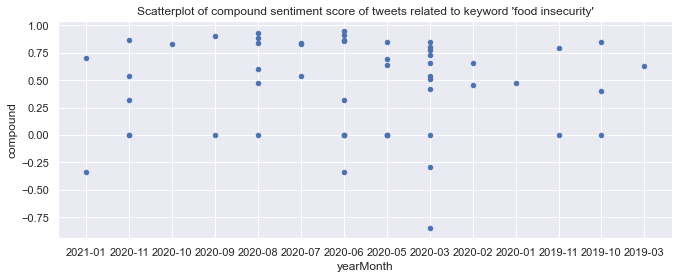

In [211]:
viztweets(tweets_fertileground)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


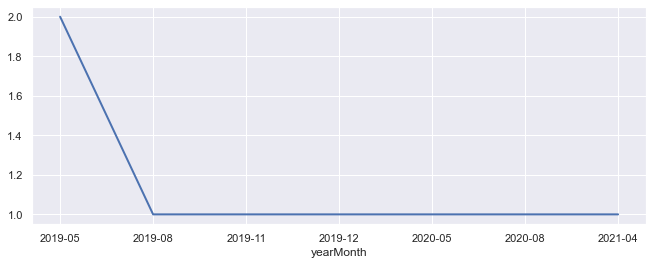

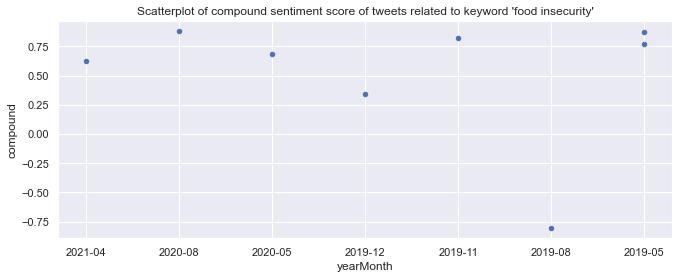

In [212]:
viztweets(tweets_foodsecurity)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


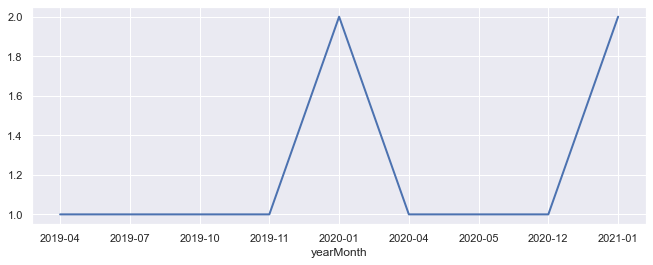

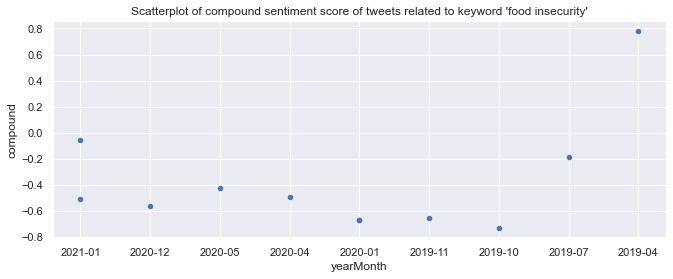

In [213]:
viztweets(tweets_foodinsecurity)

In [214]:
#adding type to tweets and making an dataframe
tweets_foodsecurity['type']="food security"
tweets_foodinsecurity['type']="food insecurity"

tweet_twotype=[tweets_foodsecurity, tweets_foodinsecurity]
tweet_twotypes=pd.concat(tweet_twotype)


tweets_fertileground['type']="fertile ground"
tweets_fertilegroundjxn['type']="#fertilegroundjxn"
tweets_foodaccess['type']="food access"
tweets_fooddeserts['type']="food deserts"
tweets_foodhealth['type']="food health"
tweets_foodinsecurity['type']="food insecurity"
tweets_foodsecurity['type']="food security"
tweets_foodswamps['type']="food swamps"
tweets_healthyfood['type']="#healthyfood"

tweet_types=[tweets_fertileground,tweets_fertilegroundjxn,tweets_foodaccess,tweets_foodhealth, tweets_foodsecurity, tweets_foodinsecurity,tweets_foodswamps,tweets_healthyfood]
tweet_alltypes=pd.concat(tweet_types)


In [215]:
tweet_alltypes

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00          19  1019294187592802309   
2018-07-14 02:40:19+00:00          20  1017961962251186177   
2018-07-11 02:06:15+00:00          21  1016866225324949505   
2018-06-27 02:36:25+00:00          22  1011800386062209025   
2018-06-23 02:40:29+00:00          23  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  Month  Day Weekday Name  \
Datetime                                                                
2021-01-22 04:12:08+00:00            0  2021      1   22       Friday   
2021-01-22 01:00:14+00:00            0  2021      1   22       Friday   
2020-11-30 22:02:50+00:00            0  2020     11 

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

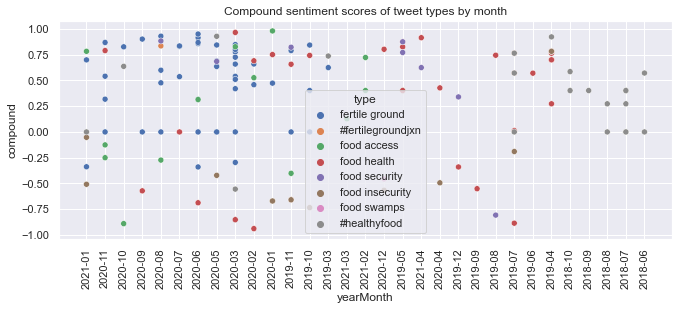

In [216]:
#Scatter plot of compound sentiment score by tweet type and month
sns.scatterplot('yearMonth','compound', data=tweet_alltypes,hue='type').set_title('Compound sentiment scores of tweet types by month')
plt.xticks(rotation=90)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Compound sentiment scores of two tweet types by month')

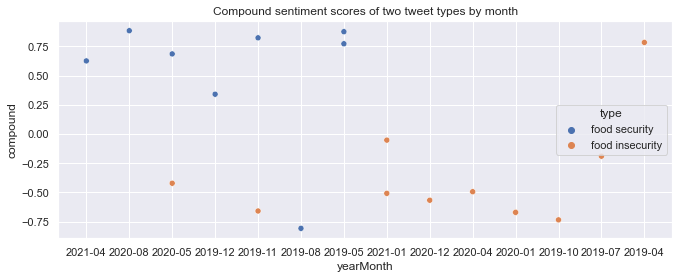

In [217]:
#Scatter plot of compound sentiment score by tweet type and month for food security and food insecurity
colors={'food insecurity':"red",'food security':'blue'}
# tweet_alltypes=tweet_alltypes.reset_index()
# tweet_alltypes.plot.scatter(x='yearMonth', y='compound', c='type'.map(colors), title= "Scatter plot between two variables");
sns.scatterplot('yearMonth','compound', data=tweet_twotypes,hue='type').set_title('Compound sentiment scores of two tweet types by month')
#title="Compound sentiment scores of tweet types by month"

In [218]:
#plot for average compound by keywords
tweet_alltypes.reset_index()
tweet_alltypes_avgCompoundbytype=tweet_alltypes.groupby('type').mean()

In [219]:
tweet_alltypes_avgCompoundbytype

Unnamed: 0      Tweet Id  Reply Count  Retweet Count  \
type                                                                      
#fertilegroundjxn         0.0  1.297944e+18     1.000000       0.000000   
#healthyfood             11.5  1.107022e+18     0.041667       0.041667   
fertile ground           26.5  1.265060e+18     0.296296       1.685185   
food access               7.0  1.289641e+18     0.133333       1.333333   
food health              15.5  1.195037e+18     0.343750       0.562500   
food insecurity           5.0  1.239639e+18     0.181818       1.090909   
food security             3.5  1.219364e+18     0.250000       0.750000   
food swamps               0.0  1.338614e+18     1.000000       0.000000   

                   Like Count  Quote Count         Year      Month        Day  \
type                                                                            
#fertilegroundjxn    2.000000     0.000000  2020.000000   8.000000  24.000000   
#healthyfood         0.500000     0.000000  2018.708333   6.500000  15.541667   
fertile ground       3.944444     0.111111  2019.925926   6.129630  17.518519   
food access          2.333333     0.066667  2020.133333   5.866667  17.266667   
food health          2.437500     0.125000  2019.406250   6.187500  12.718750   
food insecurity      2.909091     0.000000  2019.818182   5.181818  15.636364   
food security        2.625000     0.375000  2019.500000   7.250000  13.375000   
food swamps          3.000000     0.000000  2020.000000  12.000000  14.000000   

                   compound       neg       neu       pos  
type                                                       
#fertilegroundjxn  0.835500  0.000000  0.798000  0.202000  
#healthyfood       0.304971  0.011417  0.877792  0.110750  
fertile ground     0.442030  0.013130  0.806556  0.180315  
food access        0.179213  0.069933  0.808667  0.121600  
food health        0.310872  0.079531  0.753406  0.167125  
food insecurity   -0.380373  0.212182  0.738455  0.049364  
food security      0.524363  0.050125  0.772375  0.177625  
food swamps       -0.457200  0.110000  0.837000  0.054000

Text(0, 0.5, 'Compound Sentiment score')

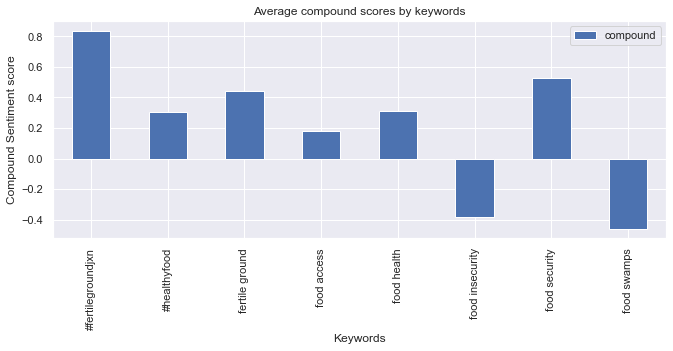

In [220]:
#bar plot by keyword's compound score
#we can see some have negative average compound and some don't. peope have more positive sentiment when taking about fertileground project and negative when talking about food insecurity
tweet_alltypes_avgCompoundbytype.plot.bar(y='compound')
plt.title("Average compound scores by keywords")
plt.xlabel("Keywords")
plt.ylabel("Compound Sentiment score")

In [221]:
fertileground_tweets_datetime

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  Month  Day Weekday Name  \
Datetime                                                                
2021-01-22 04:12:08+00:00            0  2021      1   22       Friday   
2021-01-22 01:00:14+00:00            0  2021      1   22       Friday   
2020-11-30 22:02:50+00:00            0  2020     11 

In [222]:
#function to count sentiment from above
def countSentiment(df):
    sentimentCount={}
    tweet_text=df['Text'].to_list()
    pos=0
    neg=0
    neutral=0
    for tweet in tweet_text:
        scores = analyser.polarity_scores(tweet)
        if scores["compound"]>0:
            pos+=1
        elif scores["compound"]<0:
            neg+=1
        else:
            neutral+=1
#       print(scores["compound"])
    sentimentCount={'positive':pos,'negative':neg,'neutral':neutral}
    print("number of positive: ",pos)
    print("number of negative: ",neg)
    print("number of neutral: ",neutral)
    
    return sentimentCount


In [223]:
count=countSentiment(fertileground_tweets_datetime)
print(count)

number of positive:  84
number of negative:  30
number of neutral:  25
{'positive': 84, 'negative': 30, 'neutral': 25}


Text(0.5, 1.0, 'Sentiment type counts of tweets')

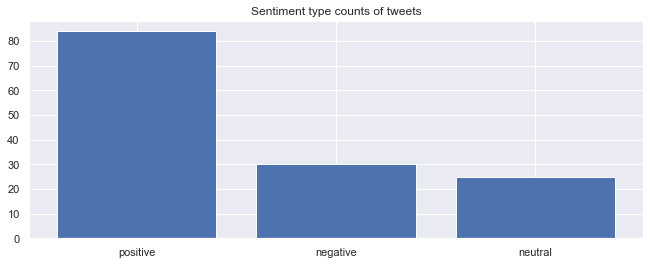

In [224]:
#bar chart of sentiment count types
keys = count.keys()
values = count.values()

plt.bar(keys, values)
plt.title("Sentiment type counts of tweets")

In [225]:
#funnel chart using plotly for sentiment type counts of tweets
#give title?
import plotly.express as px
fig = px.funnel_area(names=keys,
                    values=values)

fig.show()

In [226]:
fertileground_tweets_datetime

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  Month  Day Weekday Name  \
Datetime                                                                
2021-01-22 04:12:08+00:00            0  2021      1   22       Friday   
2021-01-22 01:00:14+00:00            0  2021      1   22       Friday   
2020-11-30 22:02:50+00:00            0  2020     11 

In [227]:
#cleaning tweets #online
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text = re.sub('<.*?>+', '', text)
 #   text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [228]:
fertileground_tweets_datetime['cleanTweet']=fertileground_tweets_datetime['Text'].apply(lambda x: clean_text(x))

In [229]:
fertileground_tweets_datetime

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  Month  Day Weekday Name  \
Datetime                                                                
2021-01-22 04:12:08+00:00            0  2021      1   22       Friday   
2021-01-22 01:00:14+00:00            0  2021      1   22       Friday   
2020-11-30 22:02:50+00:00            0  2020     11 

In [230]:
from collections import Counter
import nltk
nltk.download('stopwords')



fertileground_tweets_datetime['temp_list'] =fertileground_tweets_datetime['cleanTweet'].apply(lambda x:str(x).split())
# top = Counter([item for sublist in fertileground_tweets_datetime['temp_list'] for item in sublist])
# temp = pd.DataFrame(top.most_common(20))
# temp.columns = ['Common_words','count']
# temp.style.background_gradient(cmap='Blues')


def remove_stopwords(x):
     return [y for y in x if y not in stopwords.words('english')]
    
fertileground_tweets_datetime['temp_list'] = fertileground_tweets_datetime['temp_list'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabhstha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'set' object has no attribute 'words'

In [231]:
fertileground_tweets_datetime

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  ...  Day  Weekday Name  \
Datetime                                      ...                      
2021-01-22 04:12:08+00:00            0  2021  ...   22        Friday   
2021-01-22 01:00:14+00:00            0  2021  ...   22        Friday   
2020-11-30 22:02:50+00:00            0  2020  ...   30  

In [232]:
# fertileground_tweets_datetime['temp_list'] =fertileground_tweets_datetime['cleanTweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in fertileground_tweets_datetime['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [233]:
temp

Common_words  count
0            to    108
1           the    107
2           and     93
3          food     80
4            of     50
5            in     49
6           for     47
7             a     46
8            is     40
9             i     35
10       health     35
11           on     32
12         this     31
13         with     31
14            s     29
15          you     27
16         have     23
17  healthyfood     22
18         that     21
19          are     21

In [234]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Most Common Words')
fig.show()

In [235]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Cleaned Tweets', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [236]:
#For most common words sentiment wise
def divideSentiment(df):
    #sentimentCount={}
    tweet_text=df['Text'].to_list()
    pos=[]
    neg=[]
    neutral=[]
    for tweet in tweet_text:
        scores = analyser.polarity_scores(tweet)
        if scores["compound"]>0:
            pos.append(tweet)
        elif scores["compound"]<0:
            neg.append(tweet)
        else:
            neutral.append(tweet)
#       print(scores["compound"])
#    sentimentCount={'positive':pos,'negative':neg,'neutral':neutral}
#    print("number of positive: ",pos)
#    print("number of negative: ",neg)
#    print("number of neutral: ",neutral)
    
    return pos,neg,neutral



In [237]:
positive,negative,neutral=divideSentiment(fertileground_tweets_datetime)

In [238]:
positive

['@GanucheauAdam Thank you for retweeting! Also if people want to read thru our documentary discussion guide we also have a take action page that breaks down how you can help. \n\nhttps://t.co/wSObQbLFCI',
 '@JacksonStateU Athletics and @UHC will be providing 400 turkeys on 11/18. Please spread the word. https://t.co/EXpbqyU805',
 'Exciting! https://t.co/fPRSbRevlz',
 'Congrats to the team behind the Galloway Living Room, a learning garden for staff and students, which received a @NationalASLA award this past week! #ASLAawardss2020 🥳 https://t.co/1YJfUhw56n',
 'Check out our latest podcast with @GovLovePodcast! We talk about Fertile Ground, Ecoshed, and lots of other stuff. Thanks for having us! 💚 https://t.co/wj4fHBnqNk',
 'Join us tonight to learn how to make your own kombucha! Video drops at 6 pm on our website! \n\nIf you’d like to purchase local scoby for your brew please contact DJ Baker at esculentms(at)gmail dot com!💚\n\nhttps://t.co/3GVkOL3Ekh https://t.co/H0cFkcvTfJ',
 '"Alwa

In [250]:
fertileground_tweets_datetime

Unnamed: 0             Tweet Id  \
Datetime                                                     
2021-01-22 04:12:08+00:00           0  1352469068452868103   
2021-01-22 01:00:14+00:00           1  1352420775530291202   
2020-11-30 22:02:50+00:00           2  1333531965245566977   
2020-11-30 22:01:50+00:00           3  1333531710907150336   
2020-11-18 12:44:34+00:00           4  1329042818199908353   
...                               ...                  ...   
2018-07-17 18:54:06+00:00         158  1019294187592802309   
2018-07-14 02:40:19+00:00         159  1017961962251186177   
2018-07-11 02:06:15+00:00         160  1016866225324949505   
2018-06-27 02:36:25+00:00         161  1011800386062209025   
2018-06-23 02:40:29+00:00         162  1010351860685922305   

                                                                        Text  \
Datetime                                                                       
2021-01-22 04:12:08+00:00  @GanucheauAdam Thank you for retweeting! Also ...   
2021-01-22 01:00:14+00:00  We’ve BEEN asking for this!\n\nKey House leade...   
2020-11-30 22:02:50+00:00         Mississippi Goals! https://t.co/DrQE0Ycn3j   
2020-11-30 22:01:50+00:00                      Tips! https://t.co/iyte1eETRN   
2020-11-18 12:44:34+00:00  @JacksonStateU Athletics and @UHC will be prov...   
...                                                                      ...   
2018-07-17 18:54:06+00:00  #transformationtuesday #newbody #healthylifest...   
2018-07-14 02:40:19+00:00  #postrunfuel #berries #strawberries #strawberr...   
2018-07-11 02:06:15+00:00  #postrunmeal #crabsalad #and #sweetpotato #org...   
2018-06-27 02:36:25+00:00  #postrunmeal #healthyfood #foodporn #foodporno...   
2018-06-23 02:40:29+00:00  It’s a #blueberry stuffed #rasberry stuffed #s...   

                                  Username             User Location  \
Datetime                                                               
2021-01-22 04:12:08+00:00  _fertileground_               Jackson, MS   
2021-01-22 01:00:14+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:02:50+00:00  _fertileground_               Jackson, MS   
2020-11-30 22:01:50+00:00  _fertileground_               Jackson, MS   
2020-11-18 12:44:34+00:00  _fertileground_               Jackson, MS   
...                                    ...                       ...   
2018-07-17 18:54:06+00:00  epicdanceandfit             Ridgeland, MS   
2018-07-14 02:40:19+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-07-11 02:06:15+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-27 02:36:25+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   
2018-06-23 02:40:29+00:00        SigChiPsi  ÜT: 31.608732,-94.600016   

                           Reply Count  Retweet Count  Like Count  \
Datetime                                                            
2021-01-22 04:12:08+00:00            0              0           0   
2021-01-22 01:00:14+00:00            0              0           0   
2020-11-30 22:02:50+00:00            0              0           2   
2020-11-30 22:01:50+00:00            0              0           0   
2020-11-18 12:44:34+00:00            0              0           0   
...                                ...            ...         ...   
2018-07-17 18:54:06+00:00            0              0           1   
2018-07-14 02:40:19+00:00            0              0           0   
2018-07-11 02:06:15+00:00            0              0           0   
2018-06-27 02:36:25+00:00            0              0           0   
2018-06-23 02:40:29+00:00            0              0           0   

                           Quote Count  Year  ...  Day  Weekday Name  \
Datetime                                      ...                      
2021-01-22 04:12:08+00:00            0  2021  ...   22        Friday   
2021-01-22 01:00:14+00:00            0  2021  ...   22        Friday   
2020-11-30 22:02:50+00:00            0  2020  ...   30  

In [254]:
#Assigning labels to the tweets in the dataframe
fertileground_tweets_datetime['Sentiment Label'][fertileground_tweets_datetime.compound>0]="positive"
fertileground_tweets_datetime['Sentiment Label'][fertileground_tweets_datetime.compound<0]="negative"
fertileground_tweets_datetime['Sentiment Label'][fertileground_tweets_datetime.compound==0]="neutral"

KeyError: 'Sentiment Label'

In [253]:
df_positivetweets=fertileground_tweets_datetime[fertileground_tweets_datetime['Sentiment Label']=='positive']
df_negativetweets=fertileground_tweets_datetime[fertileground_tweets_datetime['Sentiment Label']=='negative']
df_neutraltweets=fertileground_tweets_datetime[fertileground_tweets_datetime['Sentiment Label']=='neutral']


KeyError: 'Sentiment Label'

In [242]:
df_neutraltweets

NameError: name 'df_neutraltweets' is not defined

In [ ]:
#common  words in positive tweets
top = Counter([item for sublist in df_positivetweets['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common words','count']
temp_positive.style.background_gradient(cmap='Greens')


In [ ]:
fig = px.bar(temp_positive, x="count", y="Common words", title='Most Commmon Words in Positive Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

In [ ]:
#common words in negative tweeets
top = Counter([item for sublist in df_negativetweets['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common words','count']
temp_negative.style.background_gradient(cmap='Greens')

In [ ]:
fig = px.bar(temp_negative, x="count", y="Common words", title='Most Commmon Words in Negative Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

In [ ]:
#common words in neutral tweets
top = Counter([item for sublist in df_neutraltweets['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common words','count']
temp_neutral.style.background_gradient(cmap='Greens')

In [ ]:
fig = px.bar(temp_neutral, x="count", y="Common words", title='Most Commmon Words in Neutral Tweets', orientation='h', 
             width=700, height=700,color='Common words')
fig.show()

In [ ]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_positive['count'], labels=temp_positive['Common words'], colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Most common Words in Positive Tweets')
plt.show()

In [ ]:
#plots for unique positive, negative words

In [ ]:
#visualization? - time series, score by date, pie chart. word cloud, similarly for news article wordclouds
#analysis- (may be we can clean data before processing) sentiment score(positive, negative, neutral, compound), chi-square test
#ML--count vectorizer, tf-idf, bag of words for feature extraction and NB, SVC, SGD classifier?

In [ ]:
#Now what can you do using data for sneitment analysis and ML
#11.read what you have noted before.
#1. article parse and sentiments-- article parsing done. how about we use summary and title for sentiment analysis
#2. ML on online data?

##### 